# 📚 **Chapter: Classification – Binary Classification Implementation**


### 📊 **1. Logistic Regression: Binary Classification**

Logistic Regression is a **supervised learning algorithm** used for **binary classification tasks**. It predicts probabilities and applies a **threshold (e.g., 0.5)** to classify data points into one of **two classes (0 or 1)**.


##### ✅ **1.1 Sigmoid Function**

The **Sigmoid Function** maps predictions to probabilities:

$
\sigma(z) = \frac{1}{1 + e^{-z}}
$

- $ z = \theta^T x $ (linear combination of features and weights).  
- The sigmoid function converts any real-valued input into a range between **0 and 1**.  

---

##### ✅ **1.2 Decision Rule**

To classify into one of the two classes:

$
h_\theta(x) \geq 0.5 \Rightarrow \hat{y} = 1, \quad h_\theta(x) < 0.5 \Rightarrow \hat{y} = 0
$

- If the **predicted probability** is greater than or equal to 0.5, classify as **1 (positive class)**.  
- Otherwise, classify as **0 (negative class)**.

---

#### ✅ **1.3 Cost Function (Log-Likelihood Loss)**

The cost function is derived from the **Negative Log-Likelihood (NLL)**:

$
J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right)
$

- $ m $: Number of samples.  
- $ y^{(i)} $: Actual class label for sample $ i $.  
- $ h_\theta(x^{(i)}) $: Predicted probability for sample $ i $.

Minimizing this cost function ensures better prediction probabilities.

---

##### ✅ **1.4 Gradient Descent Update Rule**

The parameters are updated using **Gradient Descent**:

$
\theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$

Where the gradient is:

$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
$

- $ \alpha $: Learning rate.  
- $ m $: Number of samples.  
- Parameters are iteratively updated until convergence.

In [1]:
from ClassificationFunction import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D


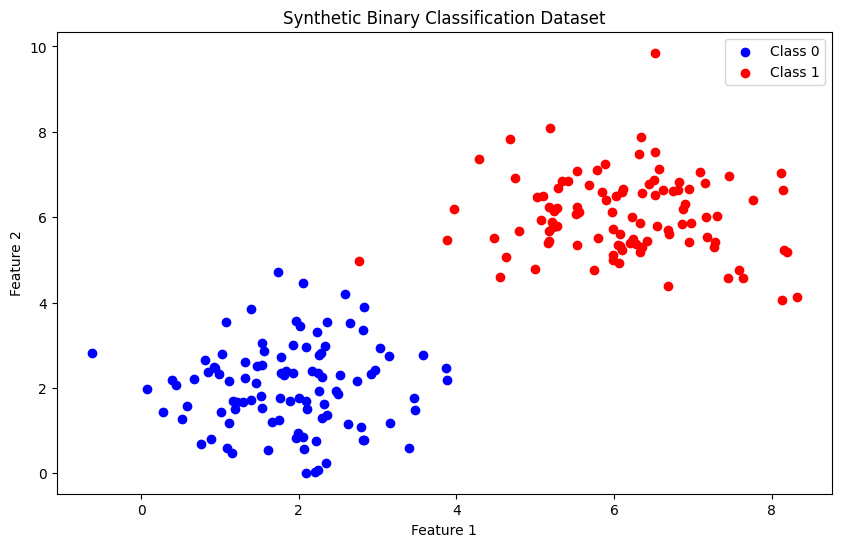

In [2]:
# Generate the dataset
X, y = generate_classification_data()

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.title('Synthetic Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [6]:
X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias column
# Initialize parameters
theta = np.zeros(X_bias.shape[1])
learning_rate = 0.1
iterations = 1000

# Train the model
theta, cost_history = gradient_descent(X_bias, y, theta, learning_rate, iterations)
print(f"Optimal Parameters: {theta}")


Iteration 0: Cost=0.5849
Iteration 100: Cost=0.1250
Iteration 200: Cost=0.0452
Iteration 300: Cost=0.0231
Iteration 400: Cost=0.0147
Iteration 500: Cost=0.0109
Iteration 600: Cost=0.0086
Iteration 700: Cost=0.0072
Iteration 800: Cost=0.0062
Iteration 900: Cost=0.0055
Optimal Parameters: [-20.33179528   2.21309017   2.99596463]


### **Linear Decision Boundary Equation:**
   - The linear decision boundary is derived from the logistic regression hypothesis:
   $$
   \theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0
   $$
   - Rearranged to:
   $$
   x_2 = -\frac{\theta_0 + \theta_1 x_1}{\theta_2}
   $$
   - This equation is used to plot the **black line** separating the two classes.


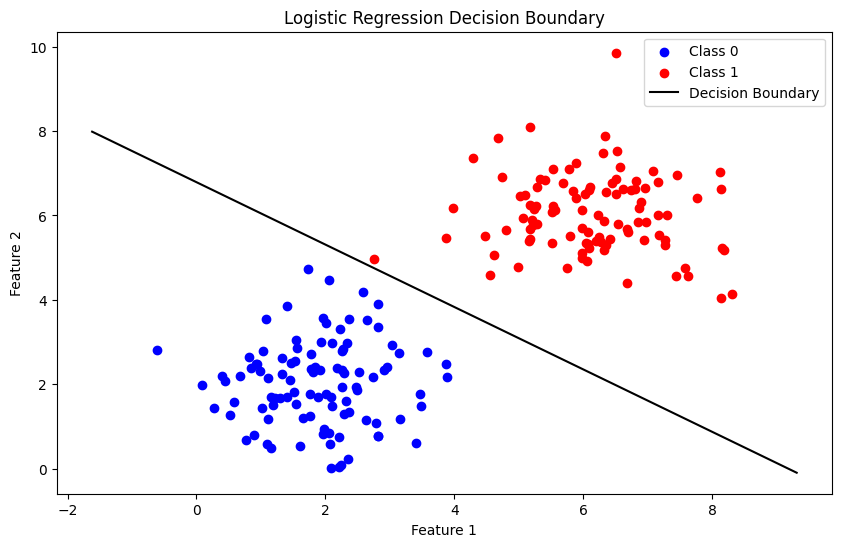

In [4]:
# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

# Plot decision boundary
x_values = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
y_values = -(theta[0] + theta[1] * x_values) / theta[2]
plt.plot(x_values, y_values, color='black', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()



In [10]:
y_pred = predict(theta, X_bias)

accuracy = np.mean(y_pred == y) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 100.00%


### Non-linear Decision Boundaries
To create non-linear boundaries, we transform our features into polynomial terms. For example, with two features $x_1$ and $x_2$, we can create:
- Original features: $x_1, x_2$
- Squared terms: $x_1^2, x_2^2$
- Cross terms: $x_1x_2$

Our hypothesis function becomes:

$h_\theta(x) = \sigma({\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1^2 + \theta_4x_1x_2 + \theta_5x_2^2})$

Let's break down what each term contributes:
- $\theta_0$: The bias term, shifting the boundary
- $\theta_1x_1, \theta_2x_2$: Linear terms creating basic slopes
- $\theta_3x_1^2, \theta_5x_2^2$: Quadratic terms allowing curves
- $\theta_4x_1x_2$: Cross-term creating rotated curves


Iteration 0: Cost=1.7151
Iteration 100: Cost=0.3928
Iteration 200: Cost=0.2958
Iteration 300: Cost=0.2235
Iteration 400: Cost=0.1663
Iteration 500: Cost=0.1234
Iteration 600: Cost=0.0923
Iteration 700: Cost=0.0682
Iteration 800: Cost=0.0504
Iteration 900: Cost=0.0372


c:\Users\emanu\Downloads\DataScienceFromScratch\ClassificationFunction.py:228: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0.5], colors='black', label='Decision Boundary')


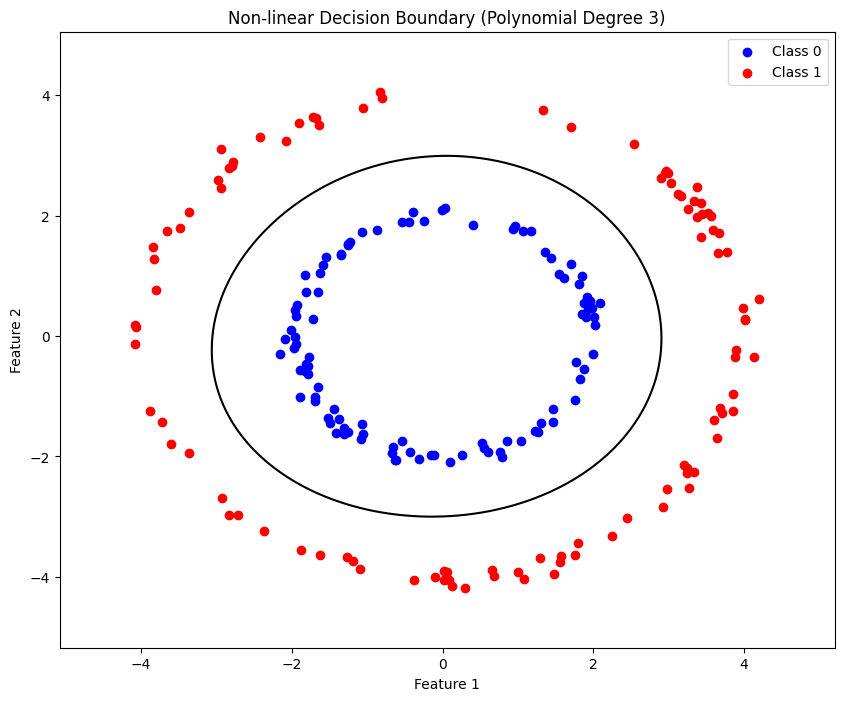

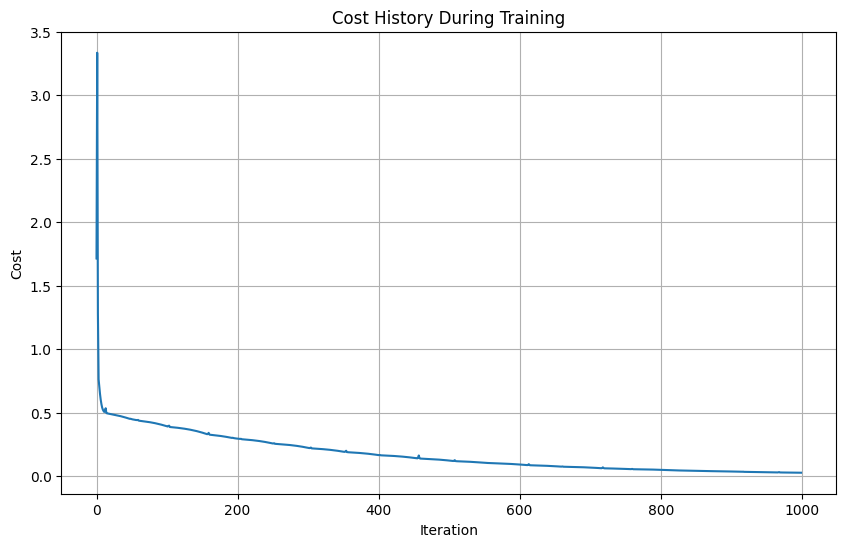

Accuracy: 100.00%


In [ ]:
# Generate non-linear dataset
X, y = generate_nonlinear_data(n_samples=200)

# Add polynomial features
poly_degree = 3
X_poly = add_polynomial_features(X, degree=poly_degree)

# Initialize parameters
theta = np.zeros(X_poly.shape[1])
learning_rate = 0.1
iterations = 1000

# Train the model
theta, cost_history = gradient_descent(X_poly, y, theta, learning_rate, iterations)

# Plot
plot_nonlinear_decision_boundary(X, y, theta, poly_degree)

y_pred = (hypothesis(theta, X_poly) >= 0.5).astype(int)

# Plot cost history
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History During Training')
plt.grid(True)
plt.show()

accuracy = np.mean(y_pred == y) * 100
print(f"Accuracy: {accuracy:.2f}%")


### Creating "Bean-Shaped" Decision Boundaries

While simple polynomial features can create curved decision boundaries, some classification problems require even more intricate shapes. Imagine trying to separate coffee beans from stones on a conveyor belt - the natural boundary might follow an irregular, bean-like curve that simple quadratic terms can't capture.

To create these complex boundaries, we extend our feature transformation to include higher-order polynomial terms. Our hypothesis function becomes:

$h_{\theta}(x) = \sigma(\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1^2 + \theta_4x_2^2 + \theta_5x_1x_2 + \theta_6x_1^3 + \theta_7x_2^3)$

Let's break down what each term contributes:
- $\theta_0$: The bias term, shifting the boundary
- $\theta_1x_1, \theta_2x_2$: Linear terms creating basic slopes
- $\theta_3x_1^2, \theta_4x_2^2$: Quadratic terms allowing curves
- $\theta_5x_1x_2$: Cross-term creating rotated curves
- $\theta_6x_1^3, \theta_7x_2^3$: Cubic terms enabling S-shaped bends **(this was added)**

Think of each term as adding a new "degree of freedom" to how our boundary can bend and curve. Just as a skilled artist needs many brushstrokes to paint a realistic bean, our model needs these various terms to shape a complex decision boundary.

Iteration 0: Cost=0.6911
Iteration 100: Cost=0.4351
Iteration 200: Cost=0.0864
Iteration 300: Cost=0.0247
Iteration 400: Cost=0.0214
Iteration 500: Cost=0.0209
Iteration 600: Cost=0.0207
Iteration 700: Cost=0.0206
Iteration 800: Cost=0.0206
Iteration 900: Cost=0.0205


C:\Users\emanu\AppData\Local\Temp\ipykernel_8764\1678623871.py:194: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0.5], colors='k', label='Decision Boundary')


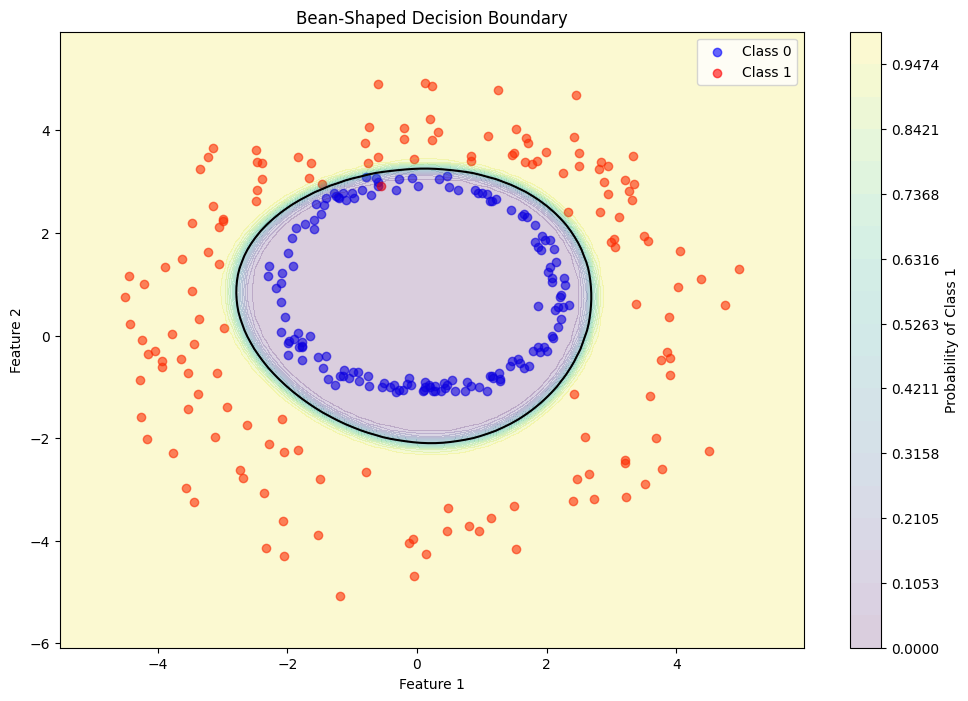

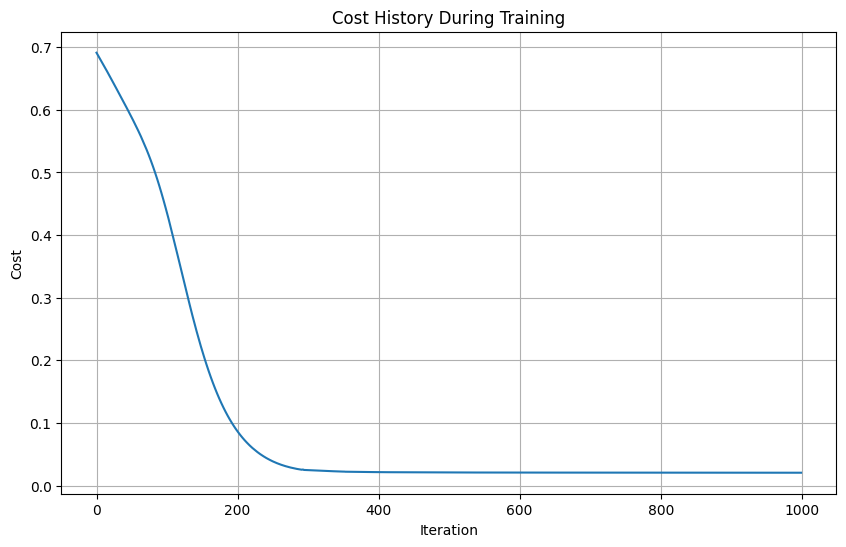

In [53]:
from sklearn.preprocessing import StandardScaler

X, y = generate_bean_data(n_samples=300, noise=0.1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create polynomial features
X_poly = create_bean_features(X_scaled)

# Initialize parameters
theta = np.zeros(X_poly.shape[1])

# Train the model
theta, cost_history = gradient_descent(X_poly, y, theta, learning_rate= 0.01,
                                              iterations=1000)

# Plot results
plot_bean_decision_boundary(X, y, theta, scaler)

# Plot cost history
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History During Training')
plt.grid(True)
plt.show()

only 1 point was missclassified, from the plot I like how it choose also the confidence of the algorith, highlighting the uncertancy of the area around the decision boundary

In [51]:
accuracy = calculate_accuracy_from_model(theta, X_poly, y)
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 99.67%


### 📚 Likelihood and Loss Function

##### 📌 1. Likelihood Function

The probability of observing the data given the parameters $\theta$ is:

$$
P(Y | X; \theta) = \prod_{i=1}^n f_{\theta}(x_i)^{y_i} (1 - f_{\theta}(x_i))^{(1 - y_i)}
$$

- $f_{\theta}(x_i) = \sigma(\theta^T x_i)$ is the **sigmoid function**.  
- $y_i$ represents the label of the $i^{th}$ sample ($0$ or $1$).  
- The likelihood assumes that each observation is **independent**.

---

##### 📌 2. Log-Likelihood Function

To simplify computation, we take the **natural logarithm** of the likelihood:

$$
\log L(\theta) = \frac{1}{n} \sum_{i=1}^n \left( y_i \log f_{\theta}(x_i) + (1 - y_i) \log (1 - f_{\theta}(x_i)) \right)
$$

- This formula represents the **average log-probability** of the data given the model.  
- Taking the mean ensures **numerical stability** for large datasets.

---

##### 📌 3. Negative Log-Likelihood (NLL)

In practice, we minimize the **Negative Log-Likelihood (NLL)** to make the optimization problem easier:

$$
\text{NLL}(\theta) = - \log L(\theta)
$$

- Minimizing NLL is equivalent to **maximizing the log-likelihood**.  
- As the **predicted probability for the correct class increases**, the **loss decreases**.

---

##### 📌 4. Gradient of the NLL

The **gradient** of the NLL with respect to the parameters $\theta$ is given by:

$$
\frac{\partial \text{NLL}(\theta)}{\partial \theta} = - \frac{1}{n} \sum_{i=1}^n (y_i - \sigma(\theta^T x_i)) x_i
$$

- $\sigma(\theta^T x_i)$ is the **predicted probability** for sample $i$.  
- $(y_i - \sigma(\theta^T x_i))$ represents the **error** (difference between actual and predicted label).  
- The gradient indicates **how to adjust each parameter** $\theta_j$ to **reduce the loss**.

---

##### 📌 5. Gradient Descent Update Rule

Using **Gradient Descent**, we iteratively update the parameters $\theta$ to minimize the NLL:

$$
\theta \leftarrow \theta + \alpha \frac{1}{n} \sum_{i=1}^n (y_i - \sigma(\theta^T x_i)) x_i
$$

- $\alpha$ is the **learning rate** (step size for each update).  
- The **direction of the gradient** tells us how to adjust $\theta$ to decrease the loss.  
- The term $(y_i - \sigma(\theta^T x_i))$ acts as the **correction factor** for each sample.


In [108]:
# Generate the dataset
X, y = generate_classification_data()
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add Bias Term
X_bias = np.column_stack([np.ones(X_scaled.shape[0]), X_scaled])

Iteration 0: Cost=0.6529
Iteration 100: Cost=0.0249
Iteration 200: Cost=0.0051
Iteration 300: Cost=0.0007
Iteration 400: Cost=0.0000
Iteration 500: Cost=0.0000
Iteration 600: Cost=0.0000
Iteration 700: Cost=0.0000
Iteration 800: Cost=0.0000
Iteration 900: Cost=0.0000
Optimized Theta: [ 8.21789561 39.95020903 58.89594543]


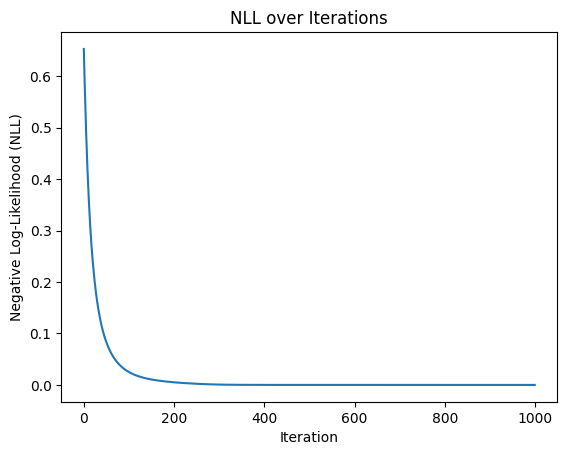

In [102]:
# Train Logistic Regression using Gradient Descent
theta = np.zeros(X_bias.shape[1])
theta, cost_history = gradient_descent(X_bias, y, theta, learning_rate=0.1, iterations=1000)

# Print Final Parameters
print("Optimized Theta:", theta)

# Plot Cost History
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood (NLL)')
plt.title('NLL over Iterations')
plt.show()


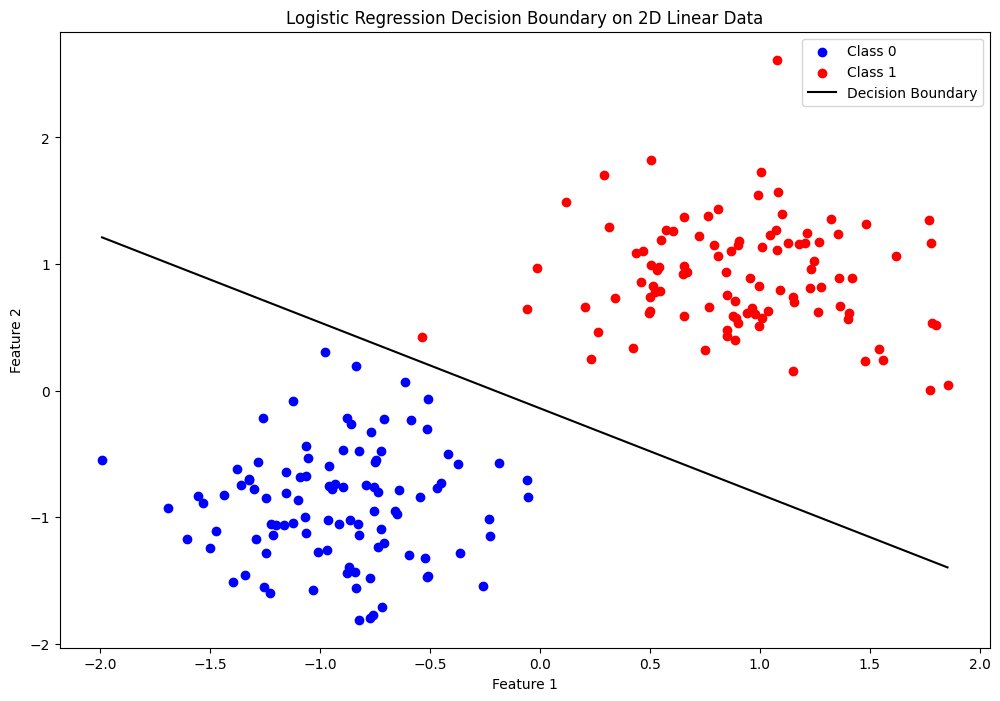

In [ ]:
plot_decision_boundary_2d(X_bias, y, theta)


In [105]:
accuracy = calculate_accuracy_from_model(theta, X_bias, y)
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 100.00%


### 📚 Newton's Method

**Newton's Method** is an optimization algorithm that uses both the **gradient** and the **Hessian matrix** to update parameters. It is known for its **quadratic convergence** near the optimal solution.

📌 1. Newton's Method Update Rule

The parameter update rule for **Newton's Method** is:

$$
\theta \leftarrow \theta - H^{-1} \nabla \text{NLL}(\theta)
$$

Where:  
- $\nabla \text{NLL}(\theta)$: The **gradient** of the Negative Log-Likelihood (NLL).  
- $H$: The **Hessian matrix**, representing the second-order partial derivatives of the NLL.

📌 2. Hessian Matrix

The **Hessian matrix** is a square matrix of second-order partial derivatives of the NLL:

$$
H = \frac{1}{n} \sum_{i=1}^n \sigma(\theta^T x_i) (1 - \sigma(\theta^T x_i)) x_i x_i^T
$$

Where:  
- $\sigma(\theta^T x_i)$ is the **sigmoid function** output for sample $i$.  
- $x_i$ represents the feature vector for sample $i$.  
- The Hessian captures the **curvature of the loss function**.

📌 3. Interpretation with Velocity and Acceleration

Newton's Method can be interpreted using **physics concepts**:

- **Velocity** ($\theta'$):  
   - Represents the **rate of change** of the parameters.  
   - Indicates how quickly and in what direction the parameters are changing.

- **Acceleration** ($\theta''$):  
   - Represents the **rate of change of velocity**.  
   - Adjusts the step size dynamically based on the curvature of the loss surface.

📌 5. Advantages of Newton's Method

1. **Quadratic Convergence:** Fast convergence near the optimal solution.  
2. **Adaptive Step Size:** Automatically adjusts step size using the Hessian matrix.  
3. **Accurate Updates:** Accounts for both gradient and curvature.

📌 6. Challenges with Newton's Method

1. **Computational Cost:** Calculating $H^{-1}$ can be computationally expensive for large datasets.  
2. **Non-Positive Definite Hessian:** If the Hessian is not positive definite, updates can fail.  
3. **Initialization Sensitivity:** Poor initialization can lead to divergence.

In [ ]:
# Initialize theta
theta_init = np.zeros(X_bias.shape[1])

# Apply Newton's Method
theta_opt = newtons_method(X_bias, y, theta_init)

print("Optimal Parameters (Theta):", theta_opt)


Iteration 1: Velocity = 1.4141, Acceleration = 0.6414
Iteration 2: Velocity = 0.9315, Acceleration = 0.1672
Iteration 3: Velocity = 0.9750, Acceleration = 0.0622
Iteration 4: Velocity = 1.1083, Acceleration = 0.0240
Iteration 5: Velocity = 1.3340, Acceleration = 0.0094
Iteration 6: Velocity = 1.6606, Acceleration = 0.0038
Iteration 7: Velocity = 2.0807, Acceleration = 0.0015
Iteration 8: Velocity = 2.4174, Acceleration = 0.0006
Iteration 9: Velocity = 2.2964, Acceleration = 0.0002
Iteration 10: Velocity = 1.8795, Acceleration = 0.0001
Iteration 11: Velocity = 1.5102, Acceleration = 0.0001
Iteration 12: Velocity = 1.2417, Acceleration = 0.0000
Iteration 13: Velocity = 1.0471, Acceleration = 0.0000
Iteration 14: Velocity = 0.9021, Acceleration = 0.0000
Iteration 15: Velocity = 0.7906, Acceleration = 0.0000
Iteration 16: Velocity = 0.7027, Acceleration = 0.0000
Iteration 17: Velocity = 0.6317, Acceleration = 0.0000
Iteration 18: Velocity = 0.5734, Acceleration = 0.0000
Iteration 19: Veloc

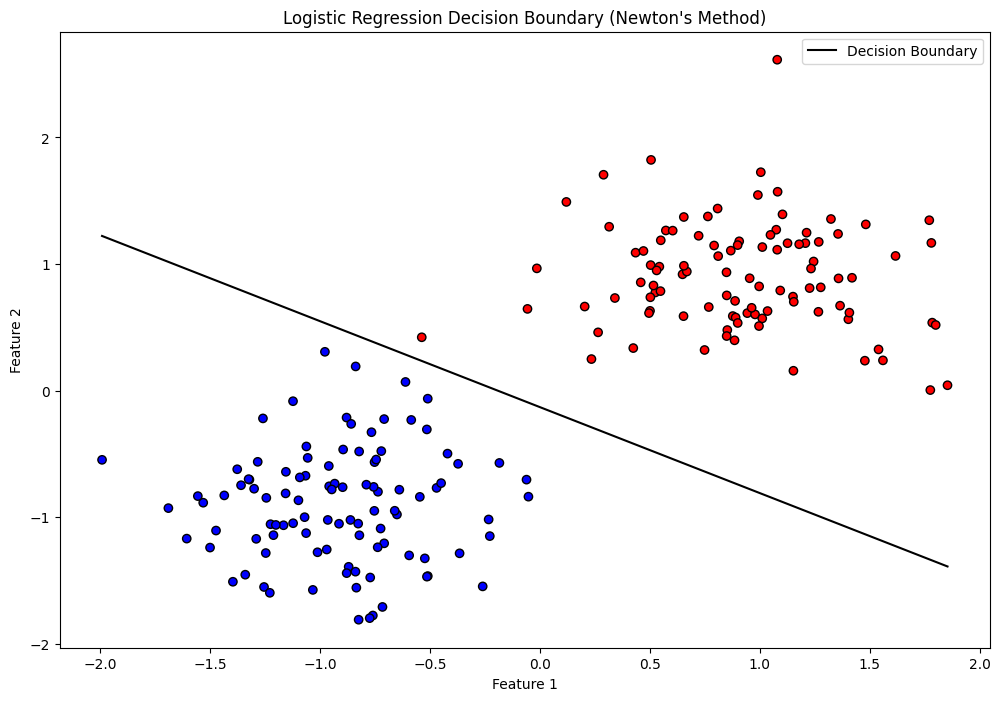

In [ ]:
plot_newton_decision_boundary(X_bias, y, theta_opt)


### 📚 Quasi-Newton Methods (BFGS) for Logistic Regression

**Quasi-Newton methods**, like **BFGS (Broyden-Fletcher-Goldfarb-Shanno)**, provide an efficient way to optimize logistic regression without explicitly computing the **Hessian matrix**, approximating it using **gradient and parameter updates**.

📌 1. BFGS Update Rule

The parameters are updated using:

$$
\theta \leftarrow \theta - \alpha B^{-1} \nabla \text{NLL}(\theta)
$$

- $B$: Approximation of the Hessian.  
- $\alpha$: Step size (learning rate).  
- $\nabla \text{NLL}(\theta)$: Gradient of the loss function.


The **Hessian approximation matrix $B$** is updated iteratively using:

$$
B \leftarrow B + \frac{y y^T}{y^T s} - \frac{B s s^T B}{s^T B s}
$$

Where:  
- $s = \theta_{new} - \theta$ → **Change in parameters**  
- $y = \nabla \text{NLL}(\theta_{new}) - \nabla \text{NLL}(\theta)$ → **Change in gradient**

These updates ensure that:
1. The Hessian approximation improves with every iteration.
2. The step size dynamically adjusts to the curvature of the loss function.

In [119]:
# Train Logistic Regression using BFGS
theta_bfgs = bfgs_logistic_regression(X_bias, y, theta_init)

print("Optimized Theta (BFGS):", theta_bfgs)


Iteration 1: NLL = 0.0000, Velocity = 0.0000
Convergence achieved!
Optimized Theta (BFGS): [ 3.87600159 20.18967405 29.72238158]


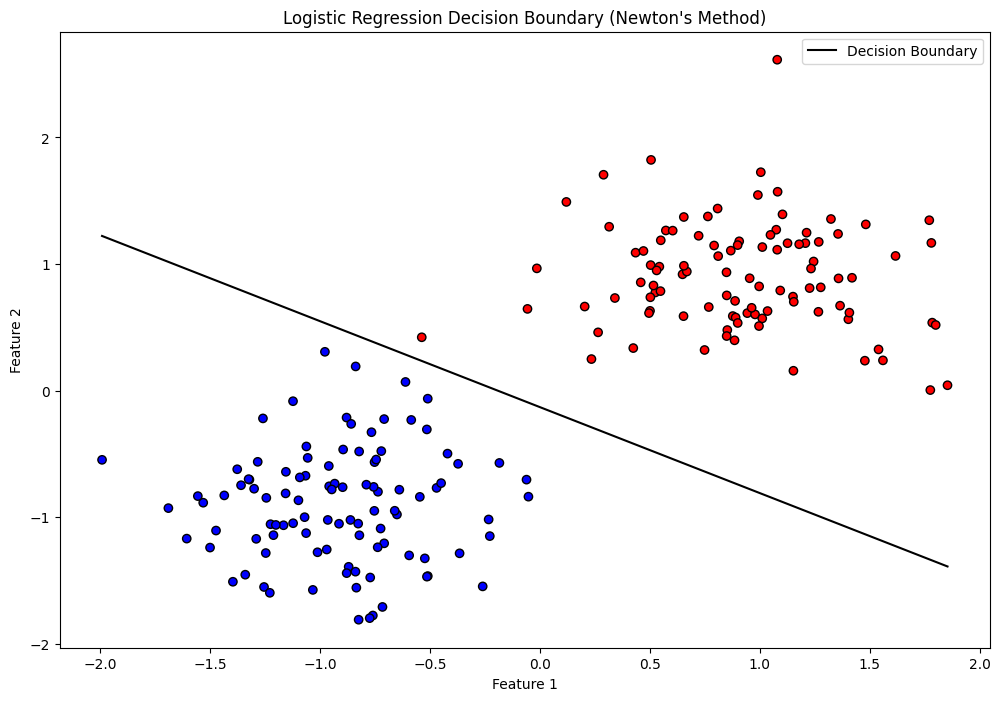

In [120]:
plot_newton_decision_boundary(X_bias, y, theta_bfgs)

# 📚 Multi-class Classification

In **multi-class classification**, we deal with problems where the target variable can belong to one of $C$ possible classes, with $C > 2$. Examples include classifying images of animals (e.g., "cat," "dog," "giraffe").

---

### 📌 1. Softmax Function

The **Softmax function** is commonly used in multi-class classification to map output vectors to a **probability simplex** (a space where each point represents a valid probability distribution across categories). 

The Softmax function for a class $i$ is defined as:

$$
\text{softmax}(a_i) = \frac{\exp(a_i)}{\sum_j \exp(a_j)}
$$

Where:  
- $a_i$ is the **logit** or raw output score for class $i$.  

**Properties of the Softmax Function**
- $\exp(a_i)$: Ensures that higher $a_i$ results in a higher probability for class $i$.  
- Summation constraint $\sum_j \exp(a_j)$: Ensures all probabilities sum to 1, maintaining a valid probability distribution.

The output **probability vector** $\mathbf{f(x)}$ represents the likelihood of each class, encoding the distribution over all classes.

---

### 📌 2. Probabilistic Interpretation and Cross-Entropy Loss

Given a **one-hot encoded target vector** $y$, where $y = [0, 1, 0]$ might represent class 2 in a 3-class problem, we can interpret the probability distribution over classes using $\mathbf{f(x)}$:

$$
P(Y = i | \mathbf{x}) = f(\mathbf{x})_i
$$

##### ✅ **Likelihood Function**

The **likelihood function** for a single data point $i$ is:

$$
P(Y^{(i)} | \mathbf{x}^{(i)}; \theta) = \prod_{j} f(\mathbf{x}^{(i)})_j^{y_j^{(i)}}
$$

Where:  
- Only the probability corresponding to the **true class** $y_j^{(i)} = 1$ contributes to the likelihood.

##### ✅ **Cross-Entropy Loss**

The **Cross-Entropy (CE) Loss**, derived from the **negative log-likelihood**, is given by:

$$
\text{CE}(\theta) = -\sum_{i=1}^{n} \sum_{j=1}^{C} y_j^{(i)} \log f(\mathbf{x}^{(i)})_j
$$

- For a **correctly classified example**, the log probability of the predicted class is **maximized**.  
- For **incorrect classes**, the probabilities do not contribute to minimizing the loss.


In [261]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Generate Synthetic Dataset
X, y = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=5,  # Lower standard deviation for better separation, not too much ofc
    n_features=4,
    random_state=42
)
# Scale Features for Consistency
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.array(y_train).reshape(-1, 1) # Ensure y_train is a 1D array

encoder = OneHotEncoder(sparse_output=False)  # Return array not sparse matrix
y_train_onehot = encoder.fit_transform(y_train)

# Verify the shape
print("Type of y_train_onehot:", type(y_train_onehot))
print("Shape of y_train_onehot:", y_train_onehot.shape)


Type of y_train_onehot: <class 'numpy.ndarray'>
Shape of y_train_onehot: (240, 3)


In [262]:
from collections import Counter
import pandas as pd

print("📝 Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

class_counts = Counter(y)
print("\n🔄 Class Distribution:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")

df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Class'] = y

print("\n🔍 First 5 rows of the dataset:")
print(df.head())


📝 Dataset Information:
Number of samples: 300
Number of features: 4
Number of classes: 3

🔄 Class Distribution:
Class 2: 100 samples
Class 0: 100 samples
Class 1: 100 samples

🔍 First 5 rows of the dataset:
   Feature_1  Feature_2  Feature_3  Feature_4  Class
0  -0.336984   0.741357  -0.244275   0.423729      2
1   0.635059   0.705300   1.108022  -1.603628      0
2   0.755683   0.196062  -1.116738   0.269663      2
3  -0.353637  -0.860678   0.089593  -0.277230      1
4   1.501764  -0.079569   0.170279   0.675646      2


In [264]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Class'] = y

print("Explained Variance Ratio by PCA Components:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2f}")


Explained Variance Ratio by PCA Components:
PC1: 0.43
PC2: 0.31


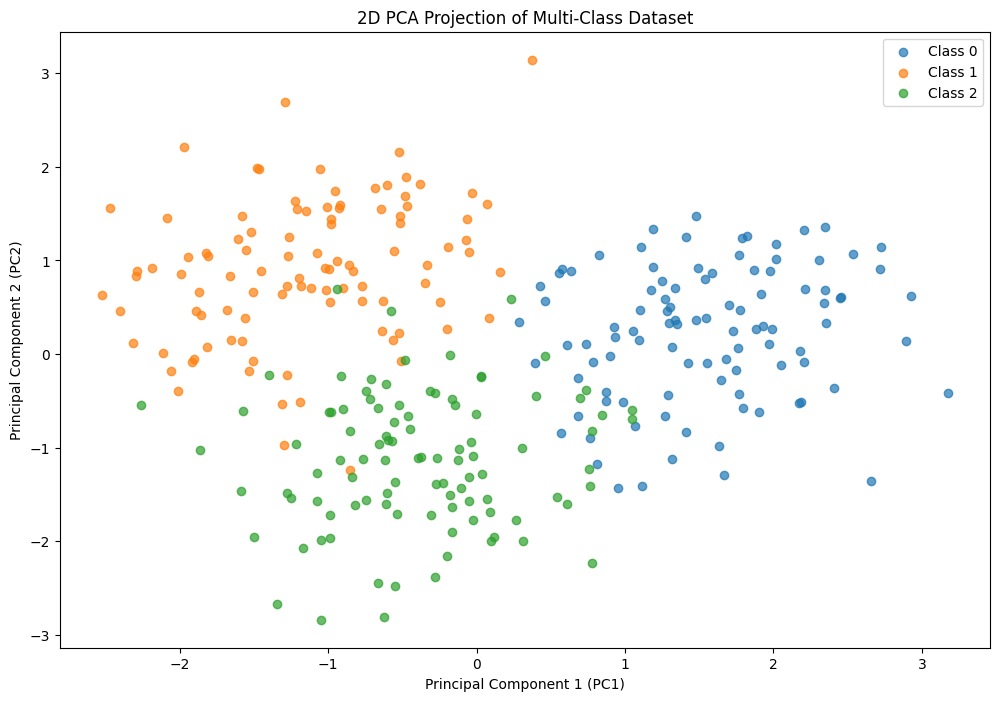

In [265]:
# Scatter plot of PCA components
plt.figure(figsize=(12, 8))
for class_label in np.unique(y):
    plt.scatter(
        df_pca[df_pca['Class'] == class_label]['PC1'],
        df_pca[df_pca['Class'] == class_label]['PC2'],
        label=f'Class {class_label}',
        alpha=0.7
    )

plt.title('2D PCA Projection of Multi-Class Dataset')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()


The choice of the standard deviation parameters was to provide a almost clear separated dataset

In [314]:
import numpy as np

# Initialize weights and biases
n_features = X_train.shape[1] 
n_classes = y_train_onehot.shape[1]

np.random.seed(42)
W = np.random.randn(n_features, n_classes) * 0.01  # Small random weights
b = np.zeros((1, n_classes))  # Zero bias

# Hyperparameters
learning_rate = 0.01
epochs = 100


# Training Loop
for epoch in range(epochs):
    # Forward pass
    logits = np.dot(X_train, W) + b # Linear transformation
    probs = softmax(logits) # Class probabilities
    
    # Compute loss
    loss = cross_entropy_loss(y_train_onehot, probs)
    
    # Compute gradients
    dW = np.dot(X_train.T, (probs - y_train_onehot)) / X_train.shape[0] # Derivative with respect to W
    db = np.sum(probs - y_train_onehot, axis=0, keepdims=True) / X_train.shape[0] # Derivative with respect to b
    
    # Update weights and biases
    W -= learning_rate * dW 
    b -= learning_rate * db
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

print("Final Weights Shape:", W.shape)
print("Final Bias Shape:", b.shape)


Epoch 0, Loss: 1.0891
Epoch 10, Loss: 1.0291
Epoch 20, Loss: 0.9747
Epoch 30, Loss: 0.9256
Epoch 40, Loss: 0.8811
Epoch 50, Loss: 0.8408
Epoch 60, Loss: 0.8042
Epoch 70, Loss: 0.7709
Epoch 80, Loss: 0.7407
Epoch 90, Loss: 0.7130
Final Weights Shape: (4, 3)
Final Bias Shape: (1, 3)


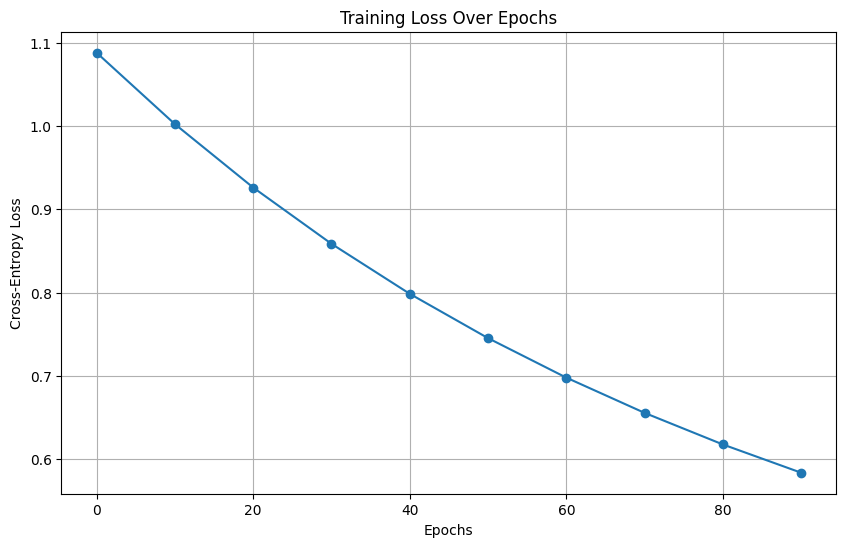

In [ ]:
import matplotlib.pyplot as plt

# Loss history collected during training manually
loss_history = [1.0879, 1.0022, 0.9261, 0.8586, 0.7986, 0.7454, 0.6980, 0.6557, 0.6178, 0.5839]

# Plot Training Loss
plt.figure(figsize=(10, 6))
plt.plot(range(0, 100, 10), loss_history, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True)
plt.show()


In [352]:
# Predict on Test Set
logits_test = np.dot(X_test, W) + b
probs_test = softmax(logits_test)
predictions = np.argmax(probs_test, axis=1)

In [353]:
from scipy.optimize import linear_sum_assignment as linear_assignment
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test.flatten(), predictions)

# Match predicted and true labels using Hungarian Algorithm
row_ind, col_ind = linear_assignment(-conf_matrix)

label_mapping = {col: row for row, col in zip(row_ind, col_ind)}
predictions_mapped = np.array([label_mapping[label] for label in predictions])


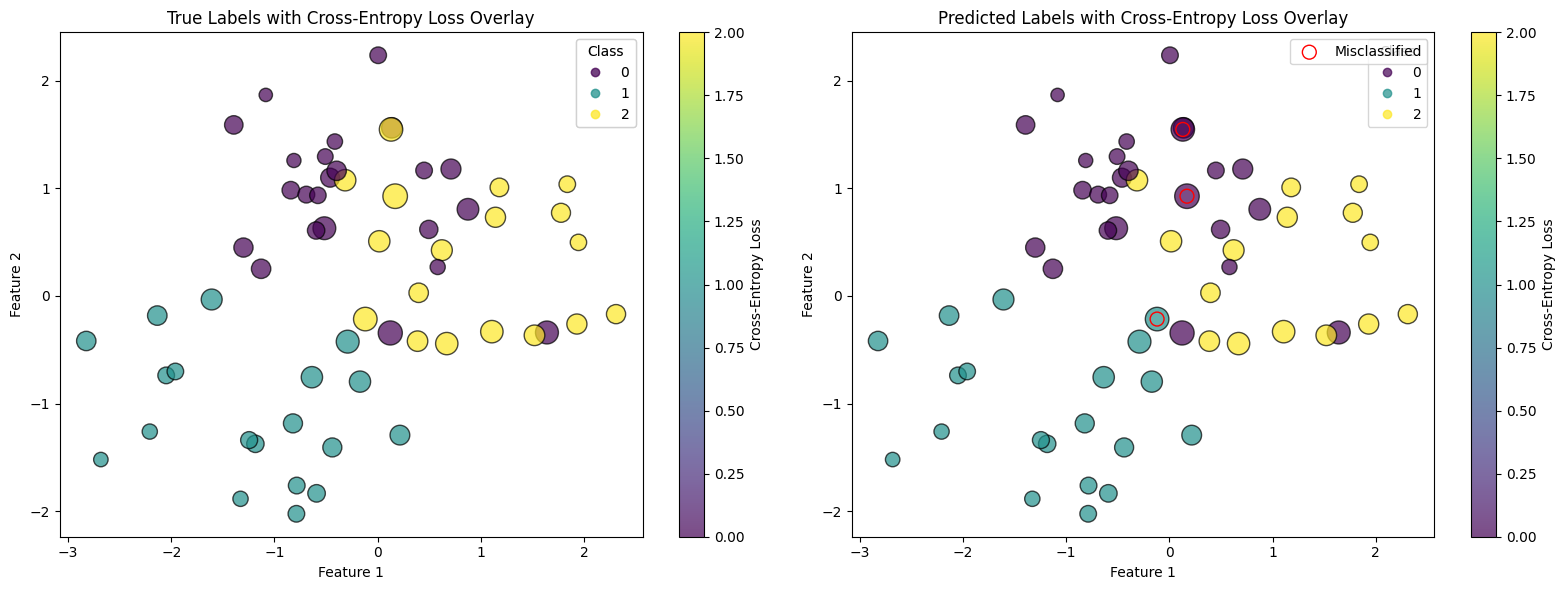

In [ ]:
plot_metric_overlay(
    X=X_test, 
    y_true=y_test, 
    y_pred=predictions_mapped, 
    probs=probs_test, 
    metric='ce_loss' 
)

In [309]:
import numpy as np
from collections import Counter

y_test_flat = y_test.flatten()
misclassified = y_test != predictions
misclassified_counts = Counter(y_test[misclassified])
total_counts = Counter(y_test)

# Display misclassification per class
for class_label in sorted(total_counts.keys()):
    total = total_counts[class_label]
    misclassified = misclassified_counts.get(class_label, 0)
    accuracy_per_class = (1 - misclassified / total) * 100
    print(f"Class {class_label}:")
    print(f"  - Total Samples: {total}")
    print(f"  - Misclassified Samples: {misclassified}")
    print(f"  - Accuracy for Class: {accuracy_per_class:.2f}%")


Class 0:
  - Total Samples: 23
  - Misclassified Samples: 0
  - Accuracy for Class: 100.00%
Class 1:
  - Total Samples: 19
  - Misclassified Samples: 0
  - Accuracy for Class: 100.00%
Class 2:
  - Total Samples: 18
  - Misclassified Samples: 3
  - Accuracy for Class: 83.33%


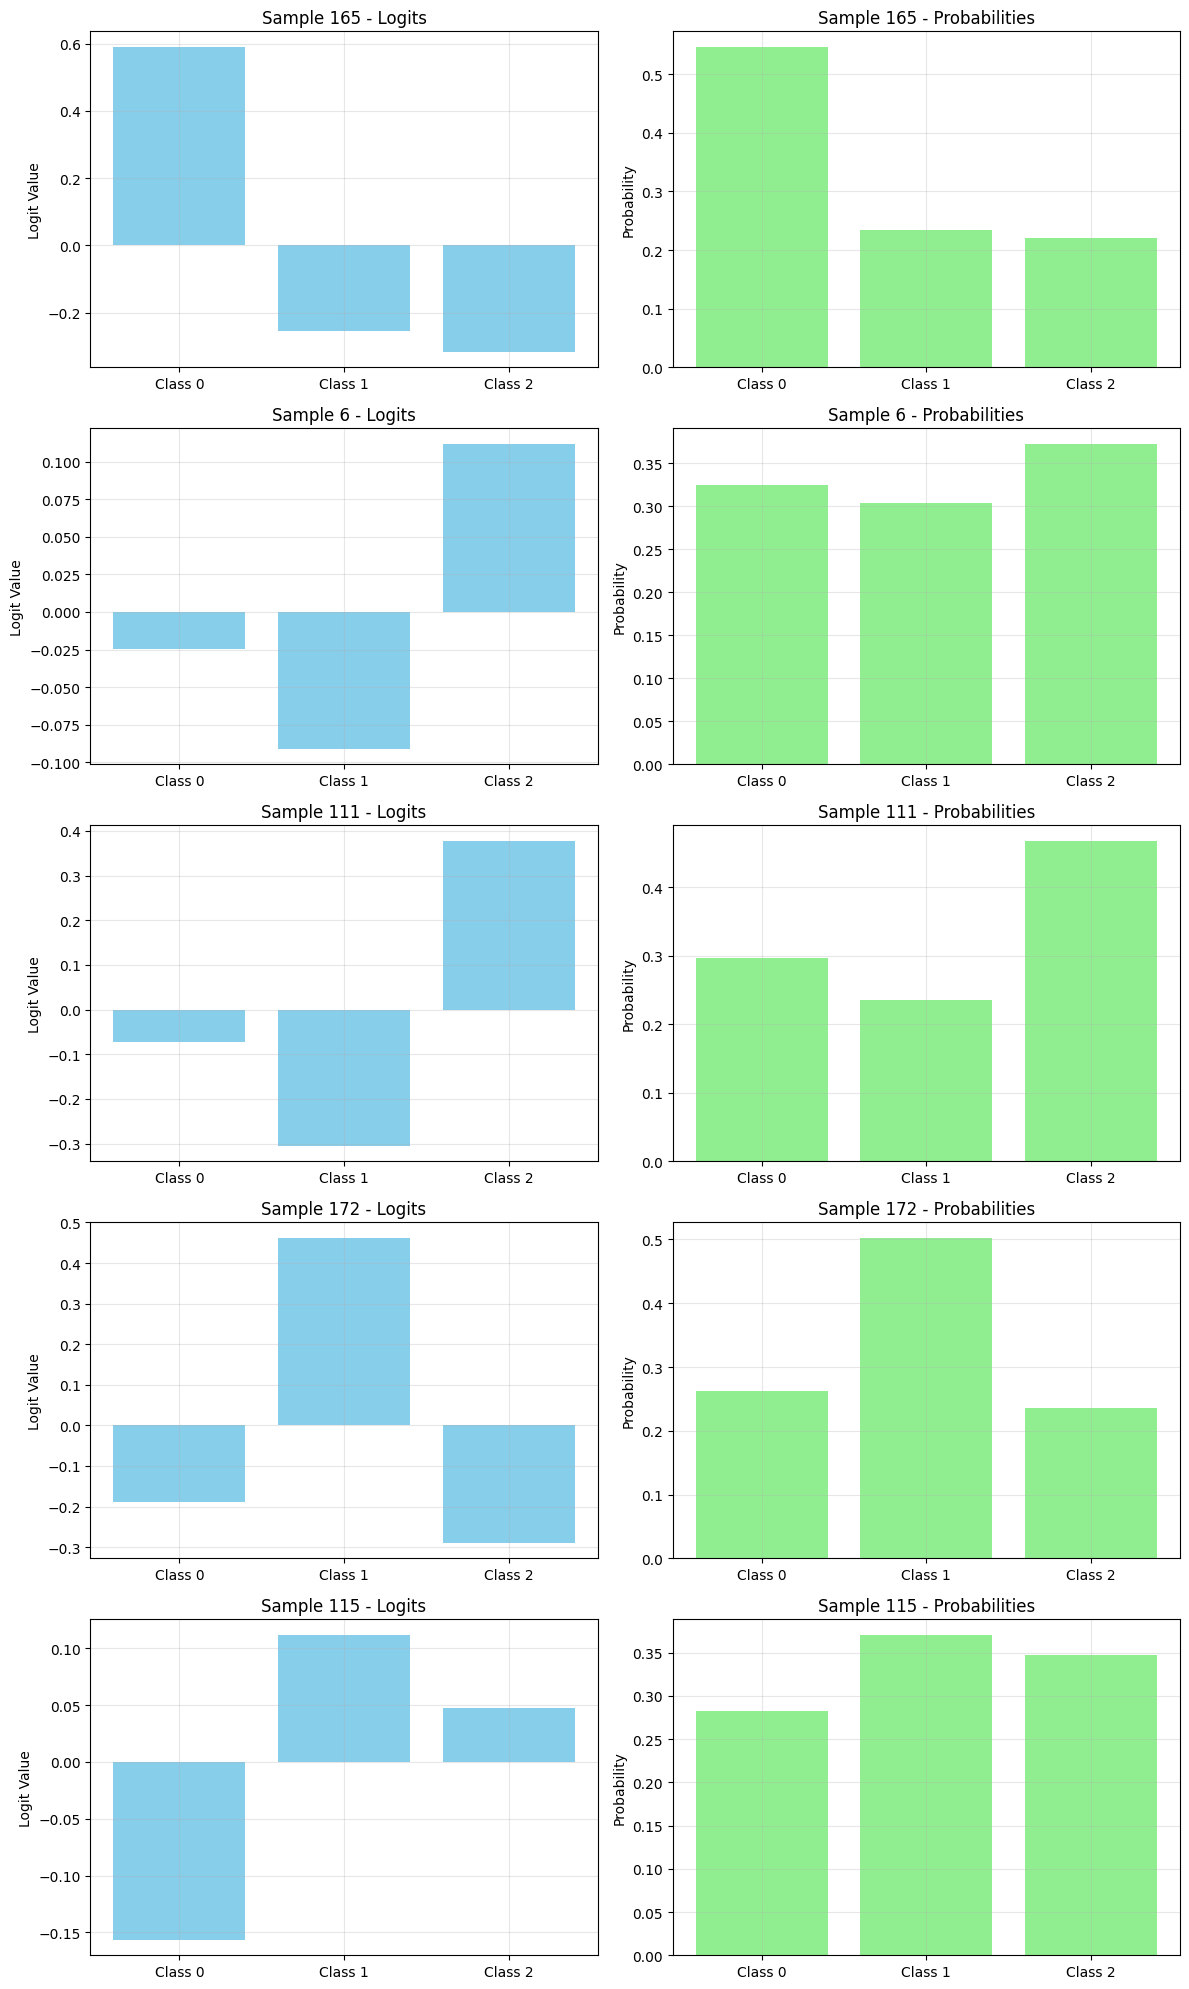

In [324]:
# Pick 5 random samples from the training set
num_samples = 5
sample_indices = np.random.choice(X_train.shape[0], num_samples, replace=False)

fig, axs = plt.subplots(num_samples, 2, figsize=(12, 4 * num_samples))

for i, idx in enumerate(sample_indices):
    sample_features = X_train[idx]
    sample_true_label = y_train[idx]
    
    logits_sample = np.dot(sample_features, W) + b
    probs_sample = softmax(logits_sample.reshape(1, -1)).flatten()
    
    class_labels = [f'Class {j}' for j in range(probs_sample.shape[0])]
    
    # Logits
    axs[i, 0].bar(class_labels, logits_sample.flatten(), color='skyblue')
    axs[i, 0].set_title(f'Sample {idx} - Logits')
    axs[i, 0].set_ylabel('Logit Value')
    axs[i, 0].grid(True, alpha=0.3)
    
    # Probabilities
    axs[i, 1].bar(class_labels, probs_sample, color='lightgreen')
    axs[i, 1].set_title(f'Sample {idx} - Probabilities')
    axs[i, 1].set_ylabel('Probability')
    axs[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [325]:
# Calculate Cross-Entropy Loss
loss = cross_entropy_loss(y_train_onehot, probs)
print("Cross-Entropy Loss:", loss)

Cross-Entropy Loss: 0.46757293844655784


For 3 classes, random guessing would result in: $\log(3)≈1.10$

Our results indicate that the model is learning patterns in the data. Predictions are not random and show meaningful alignment with the true labels.

However, it is not close to 0, suggesting:
- The model still has room for improvement.
- There might be misclassifications or overlapping class distributions.


### 📌 3. Entropy, Cross-Entropy, and KL-Divergence

##### ✅ **Entropy ($H(p)$)**

Measures the **uncertainty** of a probability distribution $p$ over classes:

$$
H(p) = -\sum_{i} p_i \log p_i
$$

Where:
- $𝑝𝑖$: Probability of class 
- $𝐶$: Number of classes

🔑 **Intuition**:
- High Entropy: The probabilities are spread out evenly across all classes (e.g., [0.33, 0.33, 0.33]).
- Low Entropy: One class has a high probability while the others are close to zero (e.g., [0.95, 0.03, 0.02]).
- Zero Entropy: The model is completely confident in one class (e.g., [1.0, 0.0, 0.0]).


In [326]:
# Compute entropy for the training set predictions
train_entropy = entropy(probs)
print(f"Entropy on Training Set: {train_entropy:.4f}")

# Compute entropy for the test set predictions
logits_test = np.dot(X_test, W) + b
probs_test = softmax(logits_test)
test_entropy = entropy(probs_test)
print(f"Entropy on Test Set: {test_entropy:.4f}")



Entropy on Training Set: 140.7697
Entropy on Test Set: 58.8680


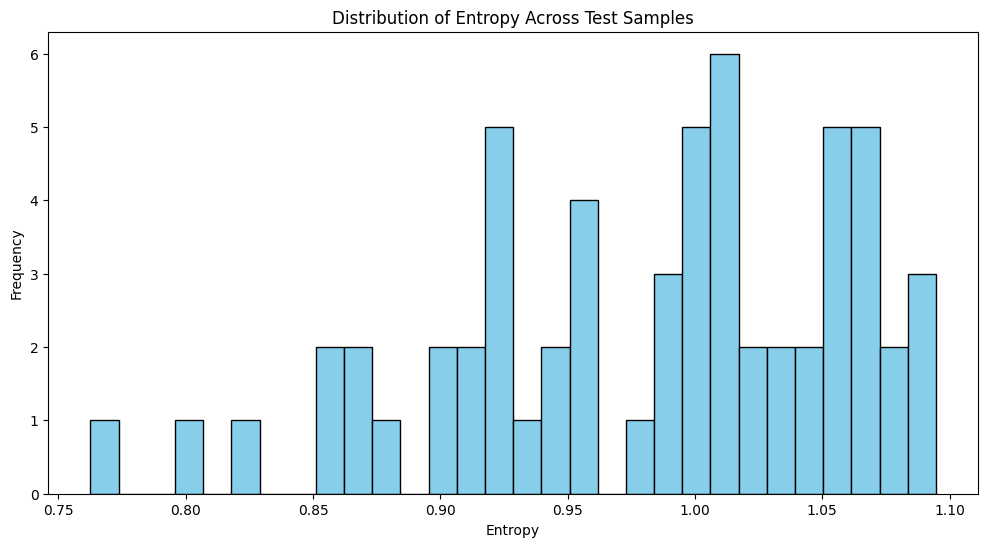

In [327]:
import matplotlib.pyplot as plt

# Calculate entropy for each test sample
sample_entropies = -np.sum(probs_test * np.log(probs_test), axis=1)

# Plot histogram of entropies
plt.figure(figsize=(12, 6))
plt.hist(sample_entropies, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Entropy Across Test Samples')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.show()


In [357]:
logits_test = np.dot(X_test, W) + b
probs_test = softmax(logits_test)
test_entropy = entropy(probs_test)

Entropy is a measure of uncertainty, not a classification output. Directly using entropy to predict class labels doesn't make sense because entropy does not represent a class index. Instead:

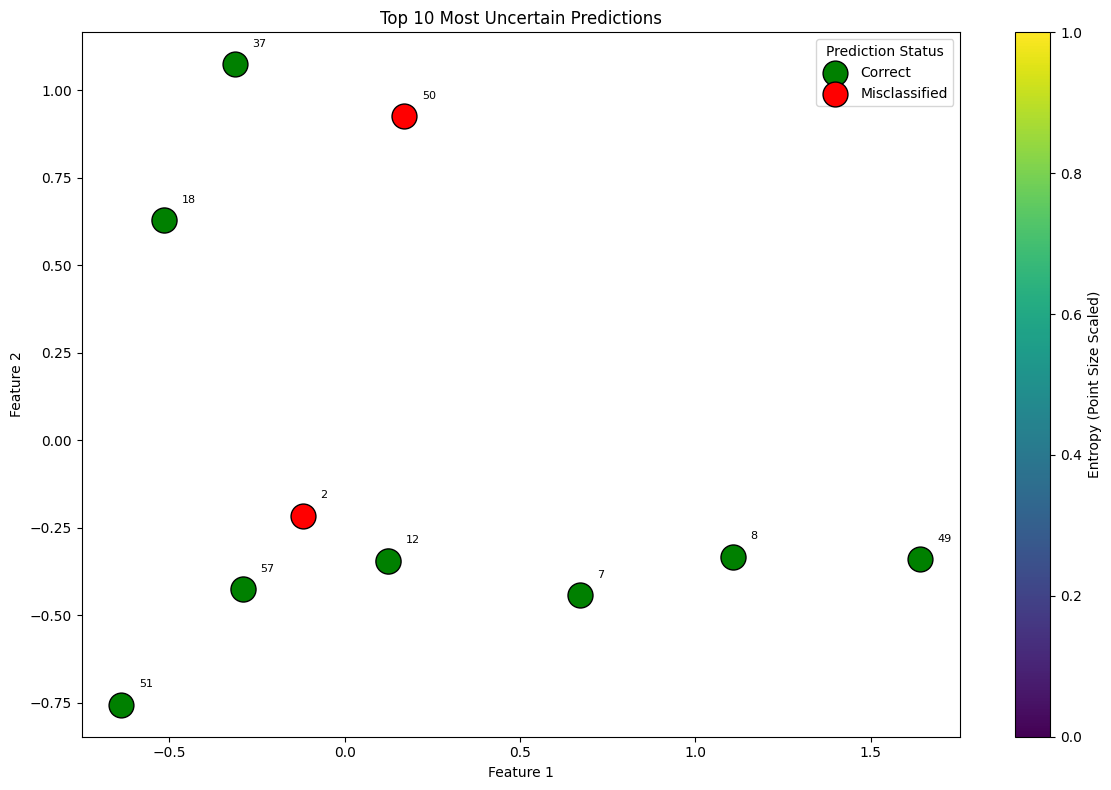

In [370]:
sample_entropies = -np.sum(probs_test * np.log(probs_test + 1e-15), axis=1)

# Find top uncertain samples (e.g., top 10 highest entropy)
top_uncertain_indices = np.argsort(sample_entropies)[-10:]

# Check correctness
true_labels = y_test.flatten()
is_correct = predictions[top_uncertain_indices] == true_labels[top_uncertain_indices]

# Visualization
plt.figure(figsize=(12, 8))
for idx, sample_idx in enumerate(top_uncertain_indices):
    color = 'green' if is_correct[idx] else 'red'
    label = 'Correct' if is_correct[idx] else 'Misclassified'
    plt.scatter(
        X_test[sample_idx, 0],
        X_test[sample_idx, 1],
        s=sample_entropies[sample_idx] * 300,  # Scale entropy for visualization
        c=color,
        edgecolor='black',
        label=label if label not in plt.gca().get_legend_handles_labels()[1] else ""
    )
    plt.text(
        X_test[sample_idx, 0] + 0.05,
        X_test[sample_idx, 1] + 0.05,
        f"{sample_idx}",
        fontsize=8
    )

plt.title('Top 10 Most Uncertain Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
if 'Correct' in legend_labels and 'Misclassified' in legend_labels:
    plt.legend(title="Prediction Status")
else:
    plt.legend(['Correct', 'Misclassified'], title="Prediction Status")

plt.colorbar(label='Entropy (Point Size Scaled)')
plt.tight_layout()
plt.show()


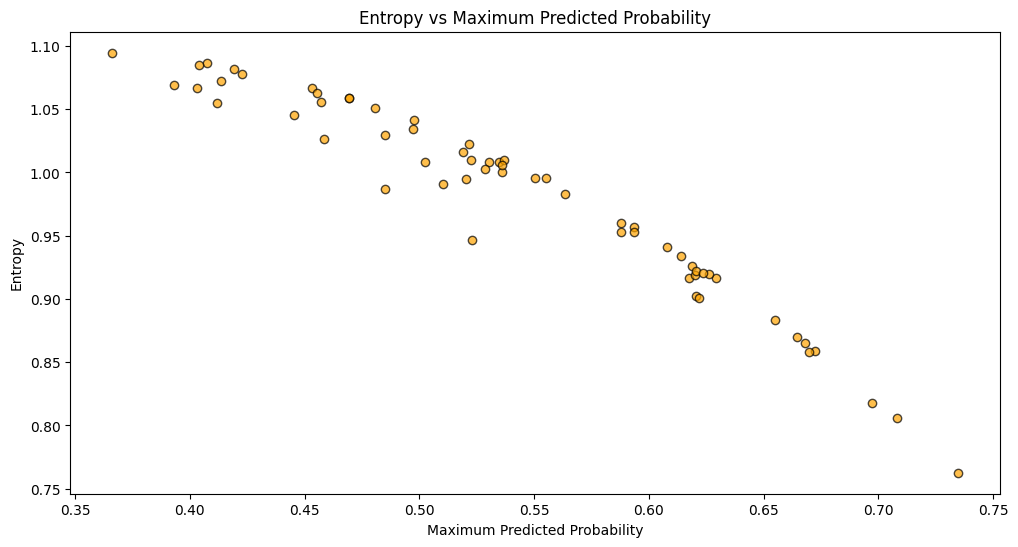

In [336]:
# Get the maximum predicted probability per sample
max_probs = np.max(probs_test, axis=1)

# Scatter plot of entropy vs maximum predicted probability
plt.figure(figsize=(12, 6))
plt.scatter(max_probs, sample_entropies, alpha=0.7, edgecolor='k', color='orange')
plt.title('Entropy vs Maximum Predicted Probability')
plt.xlabel('Maximum Predicted Probability')
plt.ylabel('Entropy')
plt.show()


##### ✅ **Kullback-Leibler Divergence (KL-Divergence)**

KL-Divergence measures the **difference between two probability distributions**: a **true distribution** $p$ and an **approximate model distribution** $q$.

It answers the question: "How different is the predicted probability distribution 𝑞 from the true distribution 𝑝?"
In our case:
- $p$: **True distribution** (one-hot encoded labels).  
- $q$: **Predicted probabilities** (Softmax output).  

The KL-Divergence is defined as:

$$
KL(p || q) = \sum_i p_i \log \frac{p_i}{q_i}
$$

Where:
- $p_i$: Probability of the true label for class $i$.
- $q_i$: Predicted probability for class $i$ (from the Softmax output).

---

🔑  **Key Intuition**

1. **Low KL-Divergence:** The predicted distribution $q$ **closely matches** the true distribution $p$.
   - The model is confident and accurate in its predictions.

2. **High KL-Divergence:** There is a **significant divergence** between $p$ and $q$.
   - The model is uncertain or incorrect in its predictions.

---

🔑  **Why is KL-Divergence Important?**

- KL-Divergence provides a **quantitative measure** of how well the predicted probabilities align with the true labels.  
- In classification, minimizing KL-Divergence is equivalent to **maximizing the likelihood** of correct predictions.  
- Regions with **high KL-Divergence** typically correspond to **model uncertainty or misclassifications**.

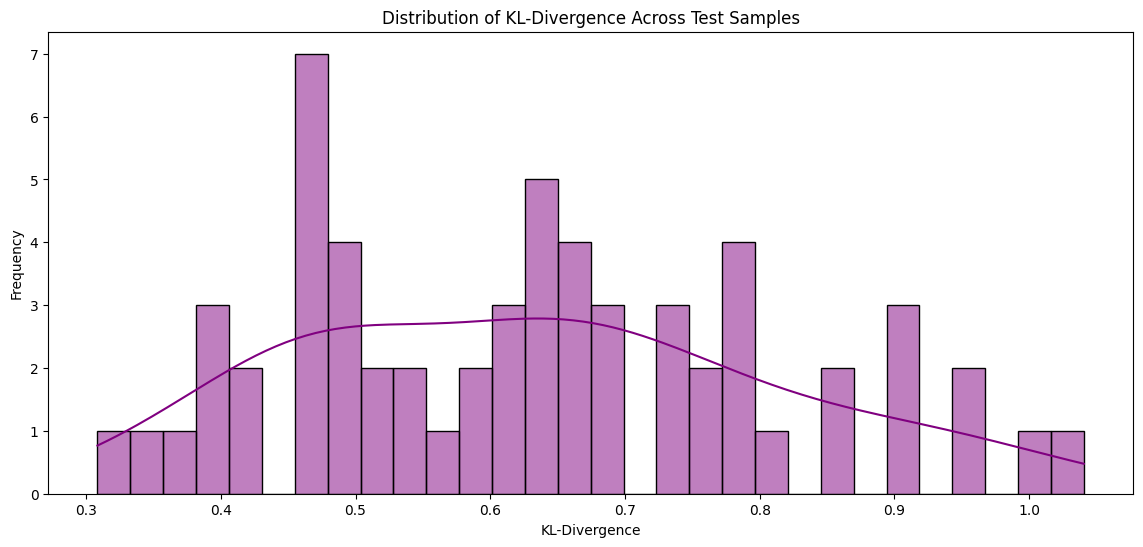

In [378]:
y_onehot = np.eye(probs_test.shape[1])[y_test.flatten()]
kl_values = kl_divergence(y_onehot, probs_test)

# Plot KL-Divergence Distribution
plt.figure(figsize=(14, 6))
sns.histplot(kl_values, bins=30, kde=True, color='purple')
plt.title('Distribution of KL-Divergence Across Test Samples')
plt.xlabel('KL-Divergence')
plt.ylabel('Frequency')
plt.show()


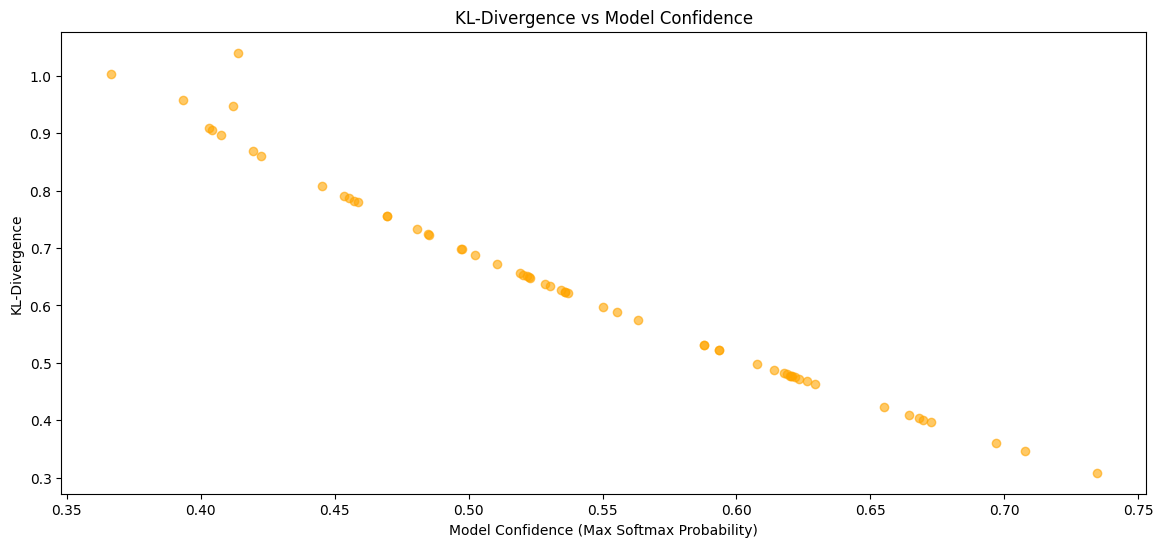

In [379]:
# Model Confidence: Take max probability from softmax
model_confidence = np.max(probs_test, axis=1)

# Scatter Plot
plt.figure(figsize=(14, 6))
plt.scatter(model_confidence, kl_values, c='orange', alpha=0.6)
plt.title('KL-Divergence vs Model Confidence')
plt.xlabel('Model Confidence (Max Softmax Probability)')
plt.ylabel('KL-Divergence')
plt.show()


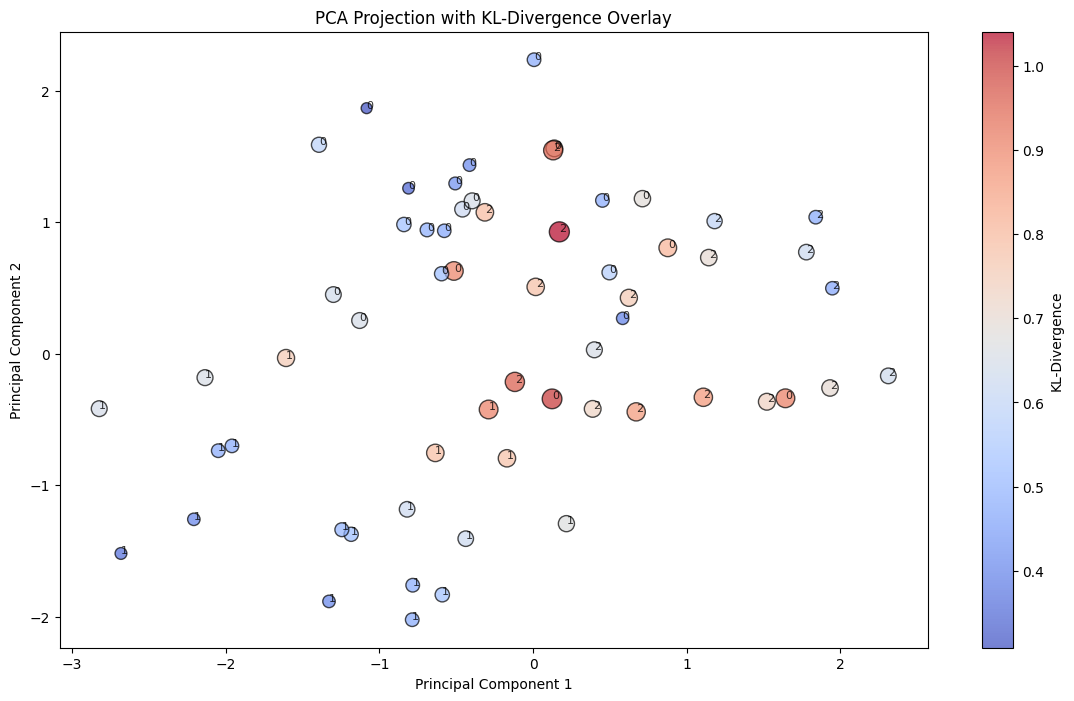

In [ ]:
# PCA Projection with KL-Divergence Overlay
fig, ax = plt.subplots(figsize=(14, 8))
scatter = plt.scatter(
    X_test[:, 0], X_test[:, 1],
    c=kl_values,
    cmap='coolwarm',
    s=kl_values * 200,  # Scale size by KL-Divergence
    alpha=0.7,
    edgecolor='k'
)

# Annotate Points with True Class Labels
for i, label in enumerate(y_test.flatten()):
    ax.text(
        X_test[i, 0], X_test[i, 1], str(label),
        fontsize=8, color='black', alpha=0.8
    )

plt.colorbar(scatter, label='KL-Divergence')
plt.title('PCA Projection with KL-Divergence Overlay')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()




KL-Divergence value becomes higher in point near to the decision boundary, so where different classes, meets. It complitely make sense

##### ✅ **Relationship Between CE, Entropy, and KL-Divergence**

The **Cross-Entropy** can be decomposed as:

$$
\text{CE}(p, q) = H(p) + KL(p || q)
$$

This indicates that **Cross-Entropy** accounts for:
1. The **inherent uncertainty** in $p$ (Entropy).  
2. The **cost of approximation** using $q$ (KL-Divergence).

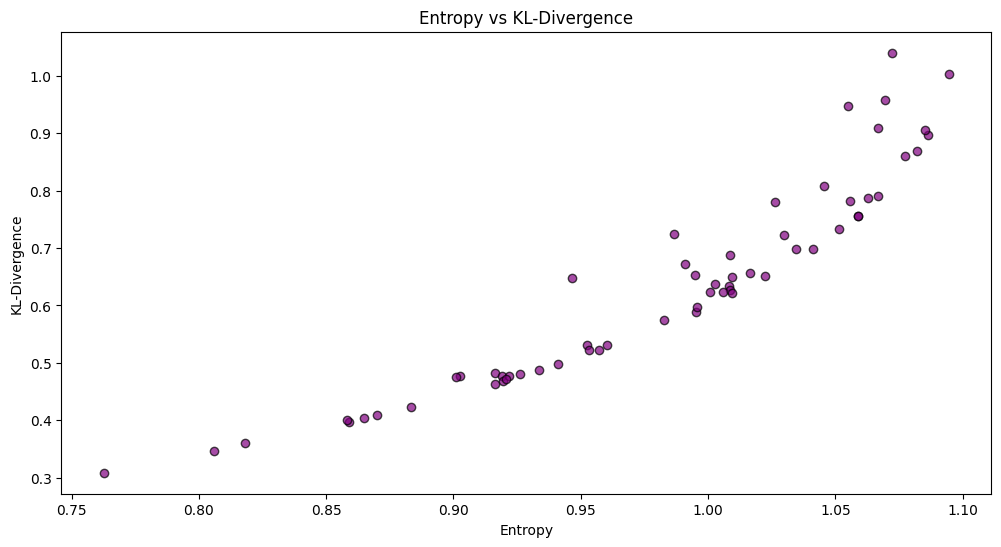

In [386]:
# Scatter Plot of Entropy vs KL-Divergence
plt.figure(figsize=(12, 6))
plt.scatter(sample_entropies, kl_values, alpha=0.7, edgecolor='k', color='purple')
plt.title('Entropy vs KL-Divergence')
plt.xlabel('Entropy')
plt.ylabel('KL-Divergence')
plt.show()


**Positive Correlation:**

As Entropy increases, KL-Divergence also tends to increase.

This suggests that higher uncertainty (entropy) often correlates with a larger difference between the predicted and true probability distributions.


### 📌 4. Expected Calibration Error (ECE)

The **Expected Calibration Error (ECE)** measures **model calibration**, assessing whether the **confidence of predictions matches the actual accuracy**.

**Steps to Calculate ECE**

1. **Divide** the interval $[0, 1]$ into $m$ bins.  
2. **Calculate** the number of samples $B_m$ whose confidence falls into each bin.  
3. For each bin:
   - $p_m$: Average **confidence** for bin $m$.  
   - $a_m$: **Accuracy** for bin $m$.  
4. Calculate the **ECE** using:

$$
\text{ECE} = \sum_{m=1}^{M} \frac{|B_m|}{n} |a_m - p_m|
$$

Where:  
- $|B_m|$: Number of samples in bin $m$.  
- $n$: Total number of samples.  
- $|a_m - p_m|$: The difference between accuracy and confidence in each bin.

**Interpretation**
- **Low ECE:** Indicates a well-calibrated model where confidence aligns with accuracy.  
- **High ECE:** Suggests overconfidence or underconfidence in predictions.

In [388]:
# Calculate Multi-Class ECE
y_true_test = y_test.flatten()
ece_per_class, avg_ece = expected_calibration_error_multiclass(y_true_test, probs_test)
print(f"Average ECE Across Classes: {avg_ece:.4f}")
for i, ece in enumerate(ece_per_class):
    print(f"ECE for Class {i}: {ece:.4f}")


Average ECE Across Classes: 0.2702
ECE for Class 0: 0.2593
ECE for Class 1: 0.2952
ECE for Class 2: 0.2562


lower calibration error is better

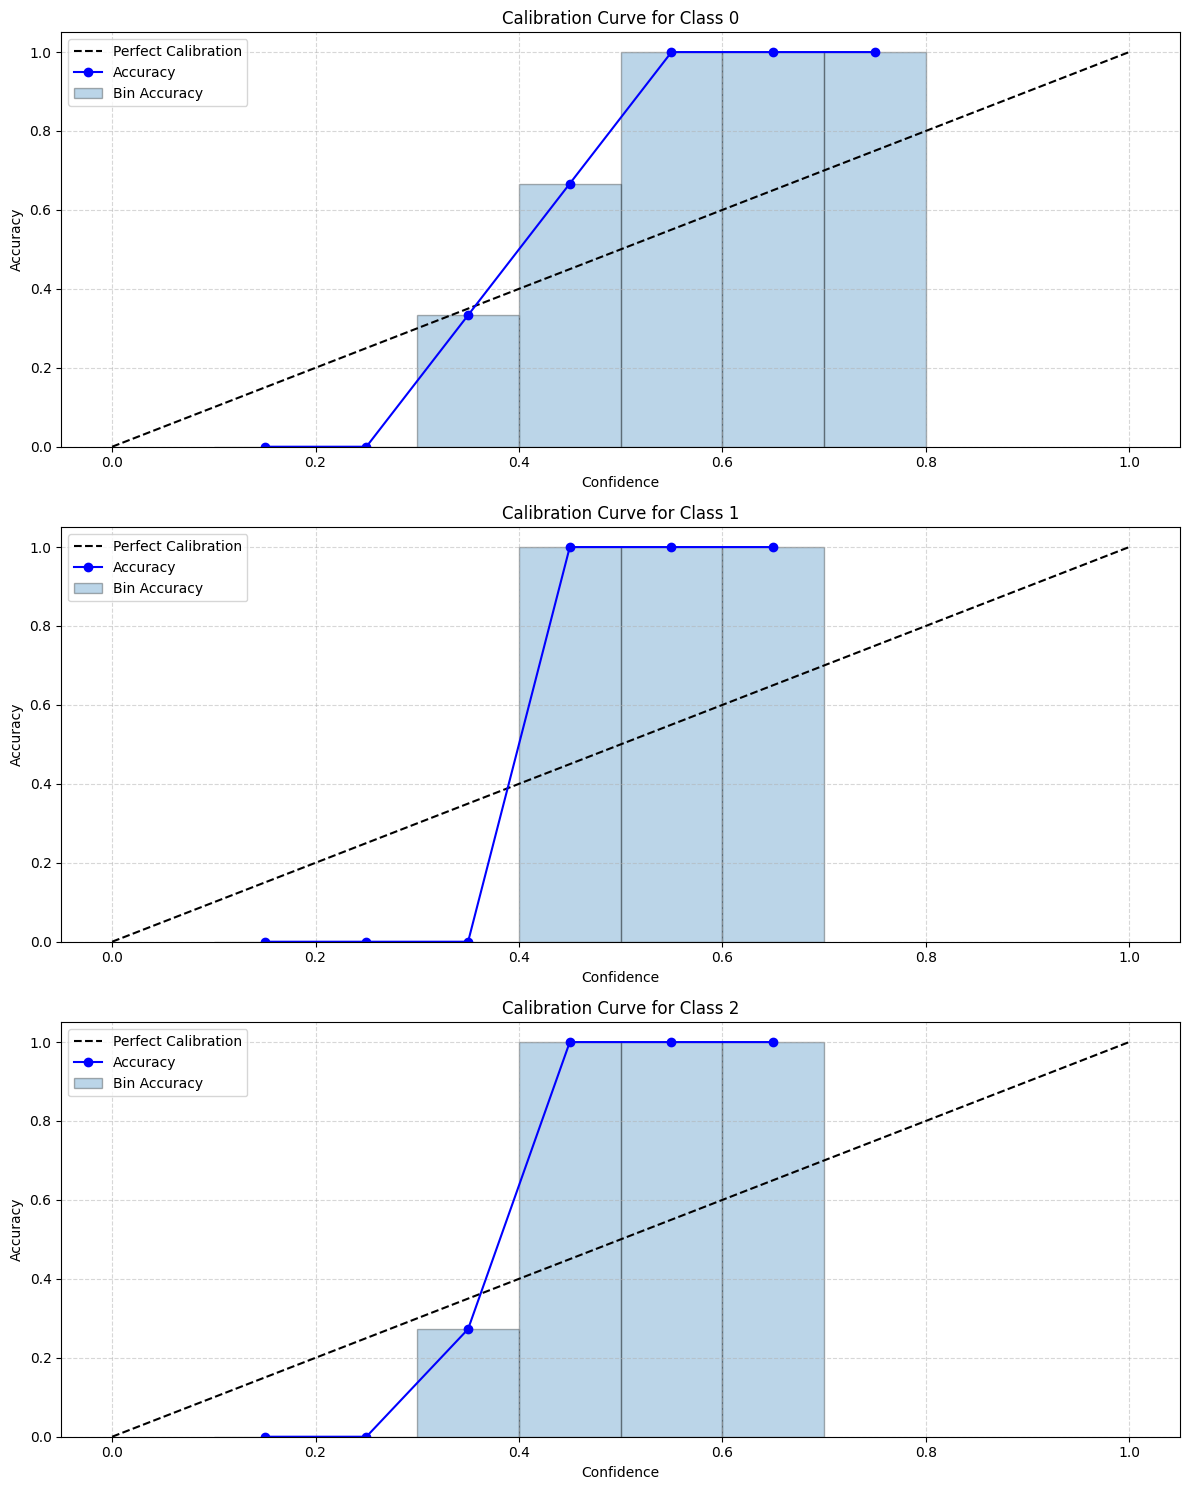

In [391]:
plot_calibration_curve_multiclass(y_true_test, probs_test)


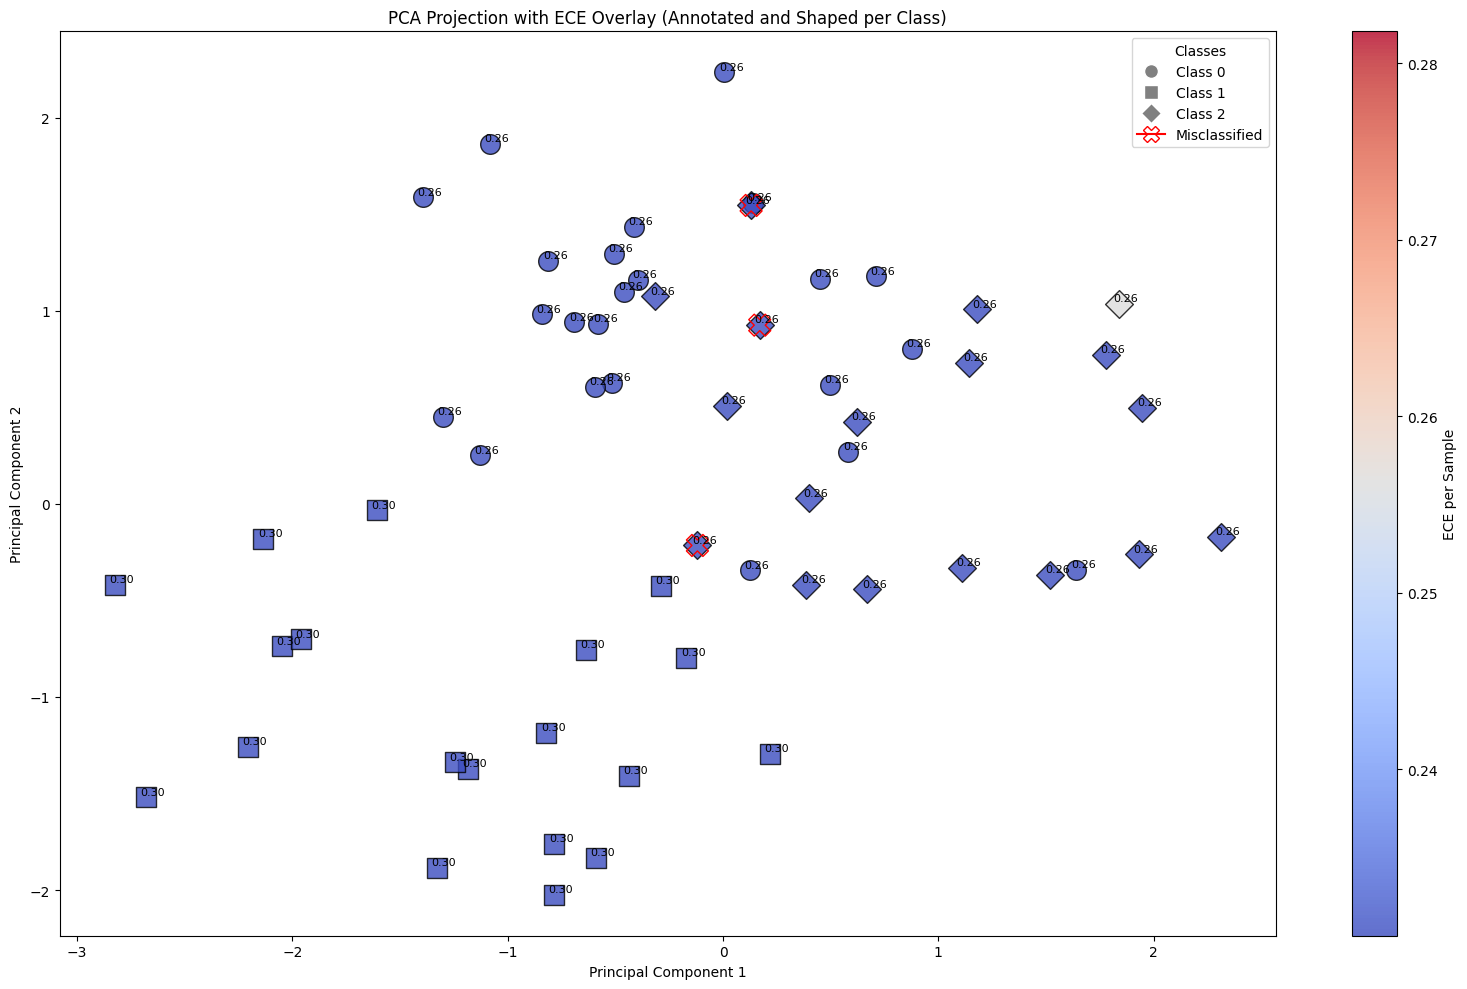

In [ ]:
sample_entropies = -np.sum(probs_test * np.log(probs_test + 1e-15), axis=1)
sample_ece = np.array([ece_per_class[label] for label in y_true_test])

shapes = ['o', 's', 'D']  # Circle, Square, Diamond
unique_classes = np.unique(y_true_test)

# Start plotting
plt.figure(figsize=(16, 10))

scatter_points = []
for i, cls in enumerate(unique_classes):
    mask = y_true_test == cls
    for idx in np.where(mask)[0]:
        scatter = plt.scatter(
            X_test[idx, 0],
            X_test[idx, 1],
            c=[sample_ece[idx]],
            cmap='coolwarm',
            s=200,
            marker=shapes[i % len(shapes)],  # Cycle through shapes
            edgecolor='k',
            alpha=0.8
        )
        scatter_points.append(scatter)
        # Annotate each point with ECE value
        plt.annotate(
            f"{sample_ece[idx]:.2f}",
            (X_test[idx, 0], X_test[idx, 1]),
            textcoords="offset points",
            xytext=(5, 2),
            ha='center',
            fontsize=8
        )

# Highlight Misclassified Points
misclassified = y_true_test != predictions_mapped
misclassified_scatter = plt.scatter(
    X_test[misclassified, 0],
    X_test[misclassified, 1],
    edgecolor='red',
    facecolor='none',
    s=250,
    marker='X',
    label='Misclassified'
)

# Plot settings
plt.colorbar(scatter, label='ECE per Sample')
plt.title('PCA Projection with ECE Overlay (Annotated and Shaped per Class)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Legend for class shapes
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Class 0'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', markersize=10, label='Class 1'),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='gray', markersize=10, label='Class 2'),
    Line2D([0], [0], marker='X', color='red', markerfacecolor='none', markersize=12, label='Misclassified')
]

# Add legend dynamically based on available classes
legend_elements = [
    Line2D([0], [0], marker=shapes[i % len(shapes)], color='w', markerfacecolor='gray', markersize=10, label=f'Class {cls}')
    for i, cls in enumerate(unique_classes)
]
legend_elements.append(Line2D([0], [0], marker='X', color='red', markerfacecolor='none', markersize=12, label='Misclassified'))

plt.legend(handles=legend_elements, title="Classes", loc='upper right')

plt.tight_layout()
plt.show()


## 📚 **Bias-Variance Trade-Off **

The **bias-variance trade-off** is a fundamental concept in machine learning that explains the sources of prediction error. It highlights the balance between **underfitting** (caused by high bias) and **overfitting** (caused by high variance), helping us optimize model performance.

##### 📌 **1. Bias**

- **Bias** refers to the error introduced when a model makes overly simplistic assumptions about the data.
- A **high-bias model** underfits the data, failing to capture complex patterns.

**Example of High Bias:**  
A linear regression model trying to fit non-linear data.

**Effect on Prediction:**  
Predictions are systematically off, and the model shows consistent error across different datasets.


##### 📌 **2. Variance**

- **Variance** refers to the error caused by the model's sensitivity to fluctuations in the training data.
- A **high-variance model** overfits the data, capturing noise along with patterns.

**Example of High Variance:**  
A high-degree polynomial regression fitting noisy training data.

**Effect on Prediction:**  
The model performs well on the training set but poorly on unseen data.

---

##### 📌 **3. Bias-Variance Trade-Off**

The total error in a model can be decomposed as:

$$
\mathbb{E}[(y - f(x))^2] = \text{Bias}(f(x))^2 + \text{Variance}(f(x)) + \sigma^2
$$

- **Bias:** Systematic deviation from the true relationship.
- **Variance:** Sensitivity to the training data.
- **Irreducible Error ($\sigma^2$):** Noise inherent in the data.

**Key Insight:**  
- As **model complexity increases**, **bias decreases** but **variance increases**.  
- The **optimal model** minimizes both bias and variance.

📊 **4. Bias-Variance Curve**

- **Underfitting (High Bias):** Too simple a model, fails to learn from data.
- **Overfitting (High Variance):** Too complex a model, learns noise from data.
- **Optimal Trade-Off:** Balance bias and variance for the best generalization.


In [411]:
def generate_nonlinear_data(n_samples=100, noise=0.1):
    """
    Generate a dataset that's not linearly separable (e.g., circular pattern)
    """
    np.random.seed(42)
    
    # Generate radius and angle for points
    r1 = np.random.normal(2, noise, n_samples//2)
    r2 = np.random.normal(4, noise, n_samples//2)
    theta = np.random.uniform(0, 2*np.pi, n_samples)
    
    # Generate inner circle (class 0)
    X1 = np.column_stack([
        r1 * np.cos(theta[:n_samples//2]),
        r1 * np.sin(theta[:n_samples//2])
    ])
    y1 = np.zeros(n_samples//2)
    
    # Generate outer circle (class 1)
    X2 = np.column_stack([
        r2 * np.cos(theta[n_samples//2:]),
        r2 * np.sin(theta[n_samples//2:])
    ])
    y2 = np.ones(n_samples//2)
    
    # Combine the datasets
    X = np.vstack([X1, X2])
    y = np.hstack([y1, y2])
    
    return X, y

def add_polynomial_features(X, degree=2):
    """
    Transform features into polynomial features up to specified degree.
    For example, if X has features [x₁, x₂] and degree=2, this will return:
    [1, x₁, x₂, x₁², x₁x₂, x₂²]
    """
    n_samples, n_features = X.shape
    combined_features = [np.ones(n_samples)]  # Add bias term
    
    # Add original features
    for i in range(n_features):
        combined_features.append(X[:, i])
    
    # Add polynomial terms
    for d in range(2, degree + 1):
        for i in range(n_features):
            for j in range(i, n_features):
                # If i == j, this adds x_i^d
                # If i != j, this adds x_i * x_j combinations
                term = X[:, i] * X[:, j]
                if i == j:
                    term = X[:, i] ** d
                combined_features.append(term)
    
    return np.column_stack(combined_features)



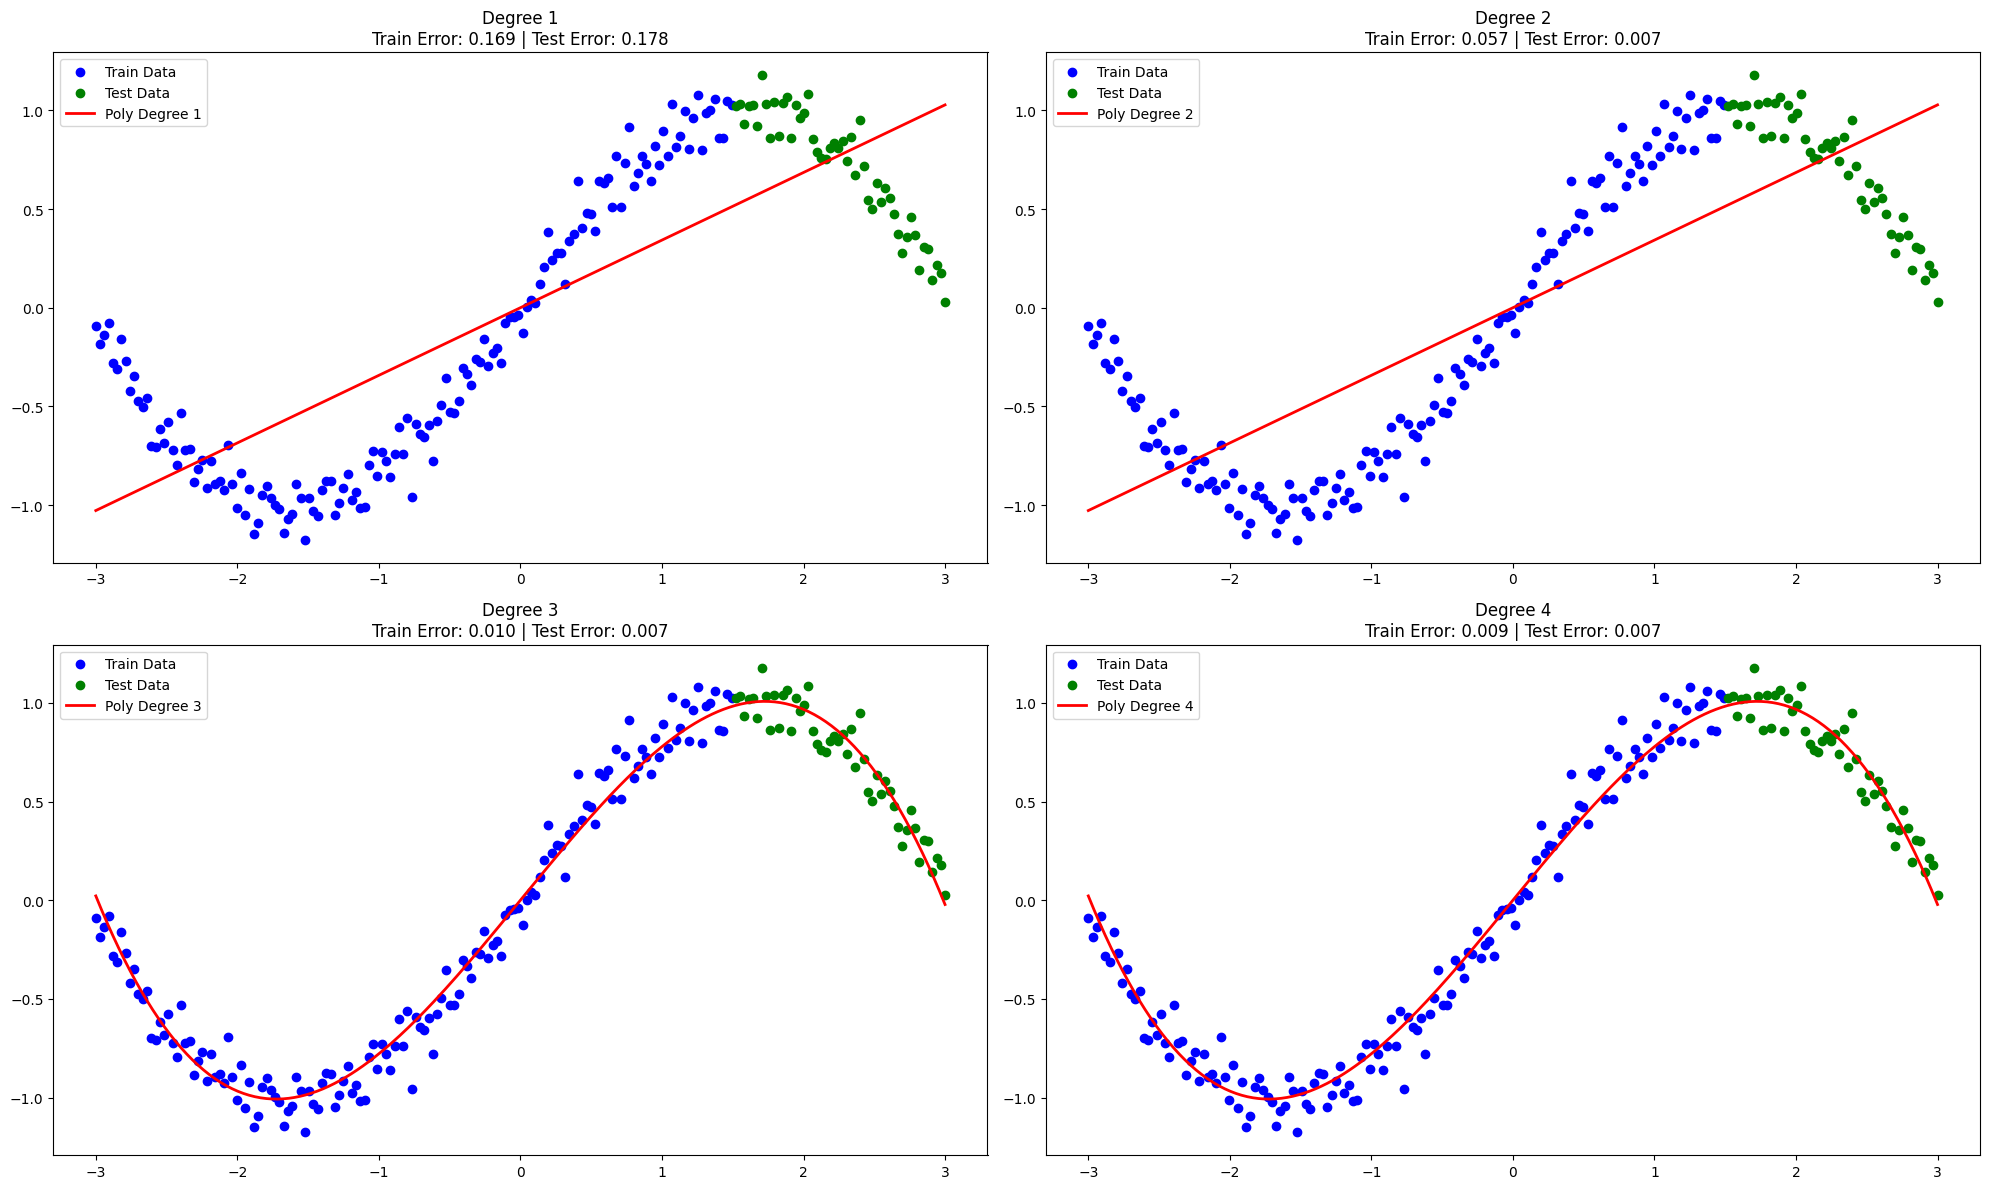

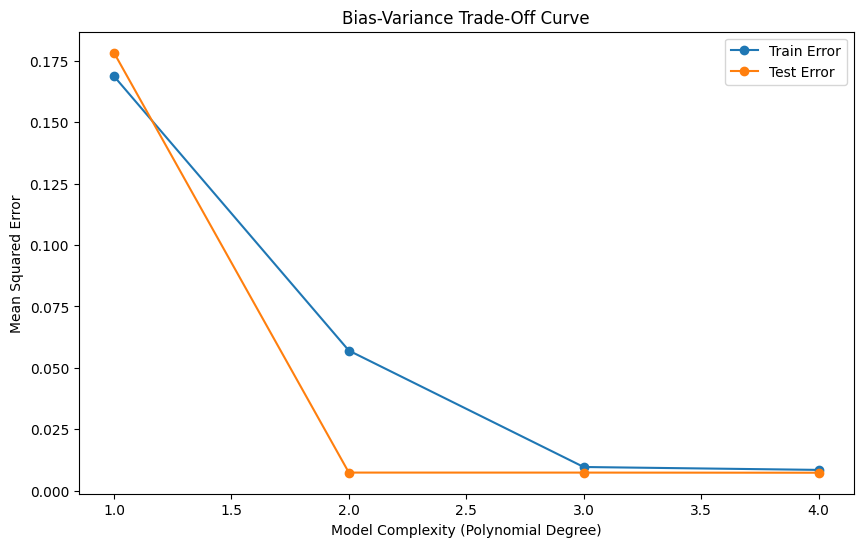

In [418]:
X, y = generate_nonlinear_squared_data(n_samples=200)
split_idx = int(0.75 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Model Complexity Experiment
degrees = [1, 2, 3, 4]  
train_errors = []
test_errors = []

plt.figure(figsize=(20, 12))
for i, degree in enumerate(degrees):
    # Train Model
    y_train_pred, coeffs = polynomial_regression(X_train, y_train, degree)
    y_test_pred, _ = polynomial_regression(X_test, y_test, degree)
    
    # Calculate Errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    # Plot Predictions
    plt.subplot(2, 2, i+1)
    plt.scatter(X_train.flatten(), y_train, color='blue', label='Train Data')
    plt.scatter(X_test.flatten(), y_test, color='green', label='Test Data')
    
    # Plot smooth predictions
    X_curve = np.linspace(-3, 3, 300).reshape(-1, 1)
    y_curve, _ = polynomial_regression(X_curve, np.sin(X_curve).flatten(), degree)
    plt.plot(X_curve, y_curve, color='red', label=f'Poly Degree {degree}', linewidth=2)
    
    plt.title(f'Degree {degree}\nTrain Error: {train_error:.3f} | Test Error: {test_error:.3f}')
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, marker='o', label='Train Error')
plt.plot(degrees, test_errors, marker='o', label='Test Error')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Trade-Off Curve')
plt.legend()
plt.show()



### **Hyperplanes in Machine Learning**

In $N$-dimensional space, a **hyperplane** is a flat subspace with $N-1$ dimensions. Hyperplanes are fundamental in classification tasks, particularly in linear classifiers like **Support Vector Machines (SVMs)**.

**Hyperplane in Different Dimensions**

- In **2D space**, a hyperplane is a **1D line**.  
- In **3D space**, a hyperplane is a **2D plane**.  
- In **$N$-dimensional space**, a hyperplane is an **$(N-1)$-dimensional subspace**.  

The general equation of a hyperplane is:
$
w_1x_1 + w_2x_2 + \cdots + w_Nx_N + b = 0
$

Where:  
- $w$ represents the **weight vector** (coefficients).  
- $b$ is the **bias term**.  
- $x$ represents the **input feature vector**.

---

**Properties and Use in Classification**

1. **Separating Classes:**  
   - In classification, a hyperplane acts as a **decision boundary**, separating data points of different classes.  
   - If the data is **linearly separable**, a linear classifier can find an **optimal hyperplane** to maximize separation.  

2. **Margin:**  
   - The **margin** is the **distance between the hyperplane and the nearest data points from either class**.  
   - Support Vector Machines (SVMs) aim to **maximize this margin** to improve the model's robustness and generalization.  

3. **Support Vectors:**  
   - Support vectors are the **data points that lie on the margin boundaries**.  
   - They directly define the hyperplane's position and orientation.

---

**Mathematical Representation**

The distance $d$ of a point $x$ from the hyperplane is given by:
\[
d = \frac{|w \cdot x + b|}{||w||}
\]

Where:  
- $w$ is the weight vector.  
- $b$ is the bias.  
- $||w||$ is the **Euclidean norm** of the weight vector.

---

**Key Insights:**
- Data points **close to the hyperplane** are more ambiguous and harder to classify confidently.
- **Larger margins** result in **better generalization** to unseen data.
- In real-world datasets, perfect linear separation is rare, and techniques like **soft margins** are applied.



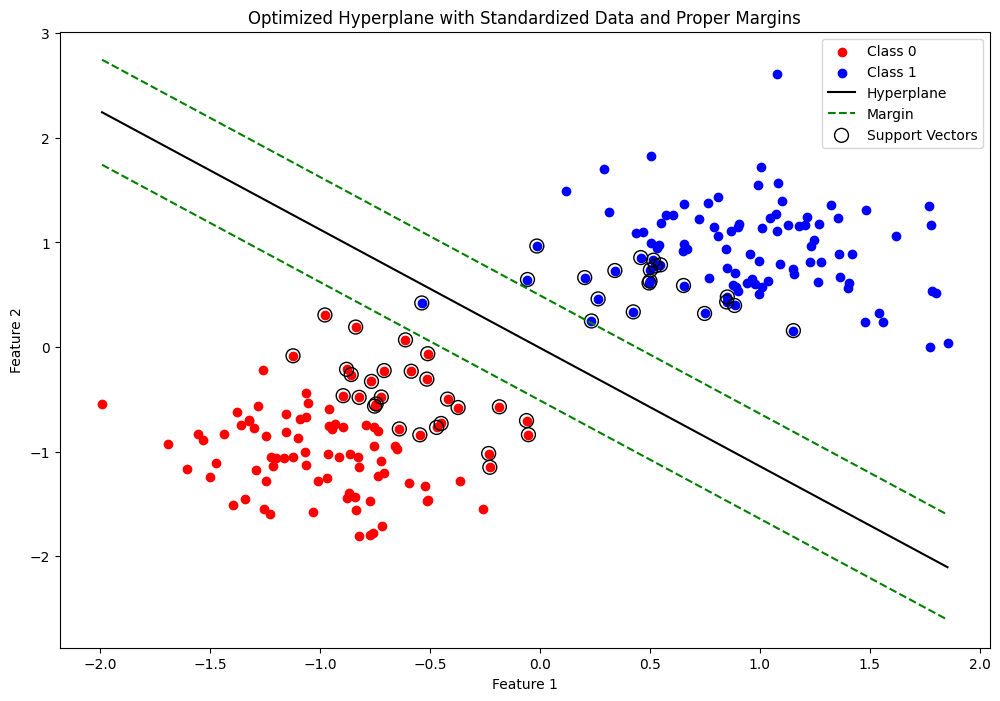

In [ ]:
X, y = generate_classification_data()
X = standardize_data(X)
# Map labels from (0,1) to (-1,+1) for hyperplane calculation
y_signed = np.where(y == 0, -1, 1)
# Train hyperplane model
W, b = hyperplane(X, y_signed)
# Plot
plot_hyperplane(X, y, W, b)


In [ ]:
distances = np.abs(X @ w + b) / np.linalg.norm(w)

for i in range(len(distances)):
    print(f"Point {X[i]} -> Distance from hyperplane: {distances[i]:.4f}")

Point [-0.64961524 -0.97895532] -> Distance from hyperplane: 0.2399
Point [-0.58464873 -0.23190969] -> Distance from hyperplane: 0.2424
Point [-0.96411832 -1.02206704] -> Distance from hyperplane: 0.0480
Point [-0.18380009 -0.57168337] -> Distance from hyperplane: 0.2813
Point [-1.06538042 -0.67280433] -> Distance from hyperplane: 0.2705
Point [-1.06277413 -1.12620897] -> Distance from hyperplane: 0.0519
Point [-0.75923873 -1.77713901] -> Distance from hyperplane: 0.7268
Point [-1.60561626 -1.16962878] -> Distance from hyperplane: 0.3012
Point [-1.29919484 -0.77547128] -> Distance from hyperplane: 0.3633
Point [-1.25409482 -1.55186143] -> Distance from hyperplane: 0.2176
Point [-0.23266838 -1.01830745] -> Distance from hyperplane: 0.5626
Point [-0.83430028 -1.55745742] -> Distance from hyperplane: 0.5184
Point [-1.09761458 -0.86690173] -> Distance from hyperplane: 0.1561
Point [-1.35864818 -0.74783833] -> Distance from hyperplane: 0.4248
Point [-1.12182235 -1.047949  ] -> Distance from

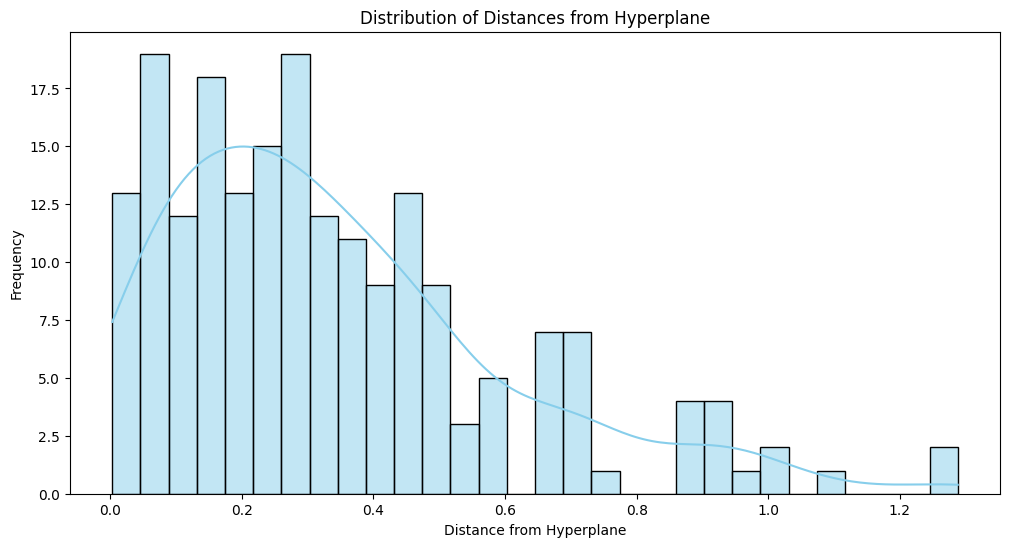

In [434]:
import seaborn as sns

# 📊 Plot Histogram of Distances
plt.figure(figsize=(12, 6))
sns.histplot(
    [distance for distance in distances],
    kde=True,
    bins=30,
    color='skyblue'
)
plt.title('Distribution of Distances from Hyperplane')
plt.xlabel('Distance from Hyperplane')
plt.ylabel('Frequency')
plt.show()


A lot of points close to 0 means many points close to the hyperplane, so less confidence

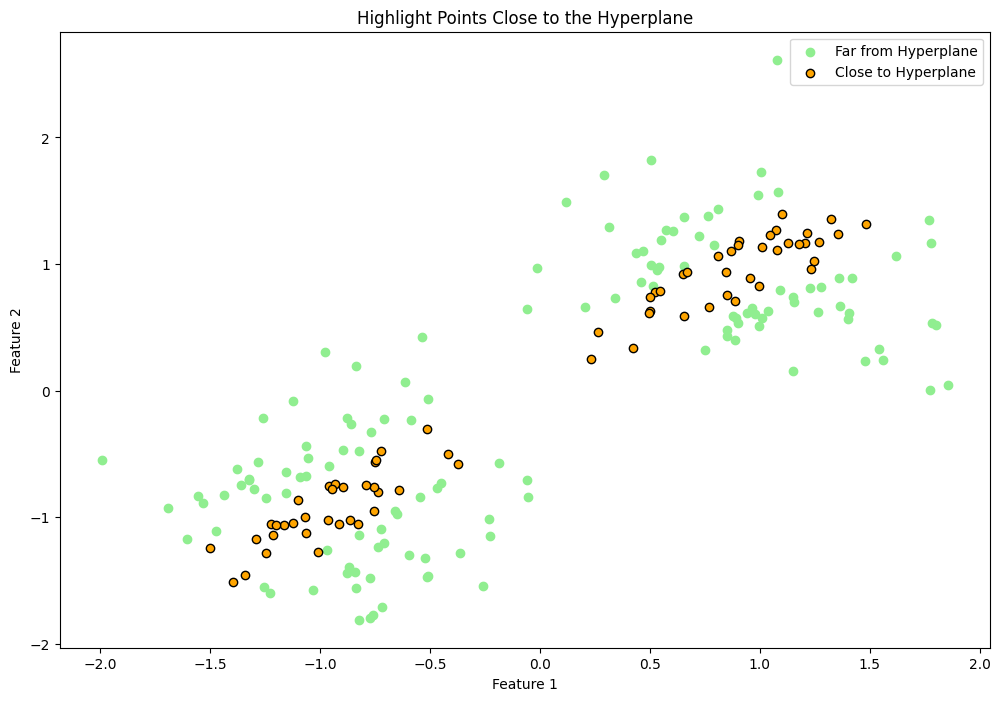

In [ ]:
# 📊 Highlight Points Close to the Hyperplane
threshold = 0.2  

close_points = distances < threshold
far_points = ~close_points

plt.figure(figsize=(12, 8))
plt.scatter(X[far_points, 0], X[far_points, 1], color='lightgreen', label='Far from Hyperplane')
plt.scatter(X[close_points, 0], X[close_points, 1], color='orange', label='Close to Hyperplane', edgecolor='k')
plt.title('Highlight Points Close to the Hyperplane')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [439]:
# Statistical Summary between classes
import pandas as pd

distance_df = pd.DataFrame({'Distance': distances, 'Label': y})
distance_summary = distance_df.groupby('Label')['Distance'].describe()
distance_summary

# I don't see a lot of difference


,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
0.0,100.0,0.331061,0.229581,0.010906,0.138258,0.276262,0.465944,1.013626
1.0,100.0,0.348651,0.285619,0.003008,0.160219,0.291851,0.446622,1.288116


##### Probability Distributions in Multi-Class Classification

Let $f(x)$ encode the probability distribution over all the classes. $f(x)_i$ represents the probability for a single class $i$.

$$
P(Y \mid f(x)) = \prod_{i=1}^{C} [f(x)_i]^{y_i}
$$

Since $Y$ is a one-hot vector, only $f(x)_y$ (the probability of the correct class) contributes to the product. Thus, we can simplify to:

$$
P(Y \mid f(x)) = f(x)_y
$$

##### Negative Log-Likelihood (NLL) and Cross-Entropy

The negative log-likelihood (NLL) can be defined as:

$$
\text{NLL} = -\sum_{i=1}^{n} \log f(x^i)_{y_i} \quad \text{= Cross Entropy}
$$

Expanding this over all classes $C$:

$$
= -\sum_{i=1}^{n} \sum_{j=1}^{C} y_j^i \log f(x^i)_j
$$



In [ ]:
# using the same Multi-Class Classification dataset
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# 📊 Generate Synthetic Dataset
X, y = make_blobs(
    n_samples=300,
    centers=3,       # 3 classes
    cluster_std=5,   # Spread of the clusters
    n_features=4,    # 4 dimensions
    random_state=42
)

# 🔄 Scale Features for Consistency
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 🔀 Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔄 One-Hot Encode Labels
y_train = np.array(y_train).reshape(-1, 1)  # Ensure proper shape
encoder = OneHotEncoder(sparse_output=False)  # Return dense array
y_train_onehot = encoder.fit_transform(y_train)

# Compute Logits and Probabilities using softmax
logits = np.dot(X_train, W) + b
probs = softmax(logits)

##### Likelihood and Log-Likelihood

The likelihood function $L$ is defined as:

$$
L = \prod_{i=1}^{n} P(Y^i \mid f(x^i))
$$

The log-likelihood is then given by:

$$
\log L = \sum_{i=1}^{n} \log P(Y^i \mid f(x^i)) = \sum_{i=1}^{n} \log f(x^i)_{y_i}
$$


In [446]:
# Compute Likelihood and Log-Likelihood
likelihoods = likelihood(probs, y_train_onehot)
log_likelihoods = log_likelihood(probs, y_train_onehot)

print("\nFirst 5 Likelihood values:")
print(likelihoods[:5])

print("\nFirst 5 Log-Likelihood values:")
print(log_likelihoods[:5])



First 5 Likelihood values:
[0.40740184 0.38985456 0.32415757 0.99453163 0.06465563]

First 5 Log-Likelihood values:
[-0.89795525 -0.94198153 -1.12652555 -0.00548338 -2.73868014]


Epoch 0, Likelihood: 0.0000000000
Epoch 10, Likelihood: 0.0000000000
Epoch 20, Likelihood: 0.0000000000
Epoch 30, Likelihood: 0.0000000000
Epoch 40, Likelihood: 0.0000000000
Epoch 50, Likelihood: 0.0000000000
Epoch 60, Likelihood: 0.0000000000
Epoch 70, Likelihood: 0.0000000000
Epoch 80, Likelihood: 0.0000000000
Epoch 90, Likelihood: 0.0000000000


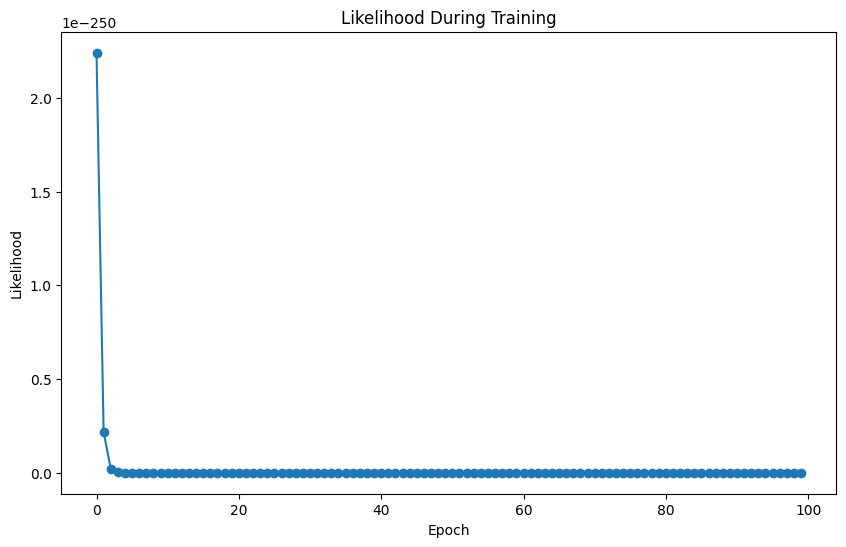

In [459]:
# Initialize Parameters
W = np.random.randn(X_train.shape[1], 3)
b = np.random.randn(1, 3)

# Train the Classifier with Likelihood
W, b, likelihood_history = train_likelihood(X_train, y_train_onehot, W, b)

# Plot Likelihood History
plt.figure(figsize=(10, 6))
plt.plot(range(len(likelihood_history)), likelihood_history, marker='o')
plt.title('Likelihood During Training')
plt.xlabel('Epoch')
plt.ylabel('Likelihood')
plt.show()


Directly optimizing likelihood is unstable because multiplying many small probabilities leads to underflow.

Epoch 0, Log-Likelihood: -3.2699
Epoch 100, Log-Likelihood: -4.8174
Epoch 200, Log-Likelihood: -6.5031
Epoch 300, Log-Likelihood: -8.2687
Epoch 400, Log-Likelihood: -10.0920
Epoch 500, Log-Likelihood: -11.9586
Epoch 600, Log-Likelihood: -13.8561
Epoch 700, Log-Likelihood: -15.7691
Epoch 800, Log-Likelihood: -17.6542
Epoch 900, Log-Likelihood: -19.4643


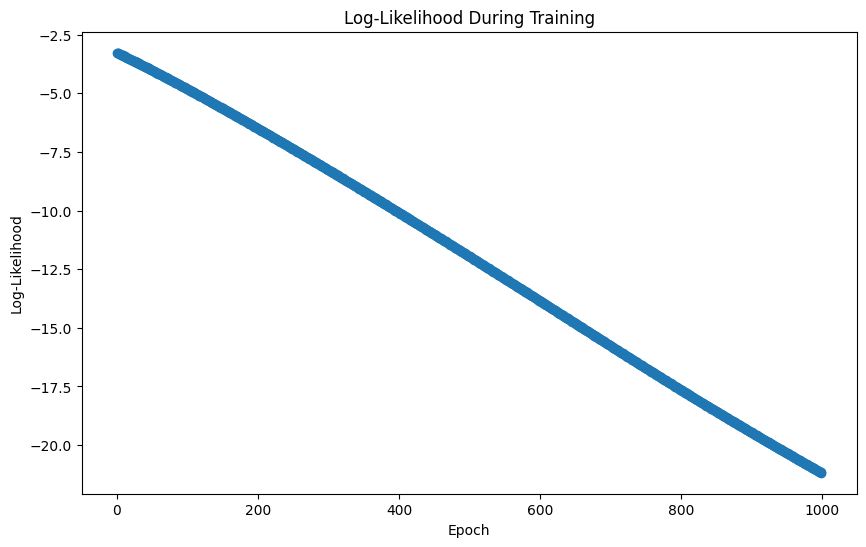

In [ ]:
W = np.random.randn(X_train.shape[1], 3)  # 4 features -> 3 classes
b = np.random.randn(1, 3)

# Train the Classifier with Log-Likelihood
W, b, log_likelihood_history = train_log_likelihood(X_train, y_train_onehot, W, b)

plt.figure(figsize=(10, 6))
plt.plot(range(len(log_likelihood_history)), log_likelihood_history, marker='o')
plt.title('Log-Likelihood During Training')
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.show()


Log-Likelihood (LL): Log-likelihood is essentially the same optimization objective as Negative Log-Likelihood (NLL), but with a flipped sign (maximizing LL is equivalent to minimizing NLL)

##### Negative Log-Likelihood (NLL) and Cross-Entropy

The negative log-likelihood (NLL) can be defined as:

$$
\text{NLL} = -\sum_{i=1}^{n} \log f(x^i)_{y_i} \quad \text{= Cross Entropy}
$$

Expanding this over all classes $C$:

$$
= -\sum_{i=1}^{n} \sum_{j=1}^{C} y_j^i \log f(x^i)_j
$$



In [449]:
# 📝 Negative Log-Likelihood (NLL)
def negative_log_likelihood(probs, y_onehot):
    """
    Compute Negative Log-Likelihood (Cross-Entropy Loss).
    """
    return -np.sum(y_onehot * np.log(probs + 1e-15)) / len(probs)

# Compute NLL
nll = negative_log_likelihood(probs, y_train_onehot)

print(f"\nNegative Log-Likelihood (Cross-Entropy Loss): {nll:.4f}")



Negative Log-Likelihood (Cross-Entropy Loss): 1.2263


In [ ]:
W = np.random.randn(X_train.shape[1], 3)  # 4 features -> 3 classes
b = np.random.randn(1, 3)

# Train the Classifier
W, b, loss_history = train_negative_log_likelihood_classifier(X_train, y_train_onehot, W, b)



Epoch 0, Loss: 0.9764
Epoch 100, Loss: 0.6874
Epoch 200, Loss: 0.5365
Epoch 300, Loss: 0.4493
Epoch 400, Loss: 0.3938
Epoch 500, Loss: 0.3557
Epoch 600, Loss: 0.3283
Epoch 700, Loss: 0.3076
Epoch 800, Loss: 0.2917
Epoch 900, Loss: 0.2790


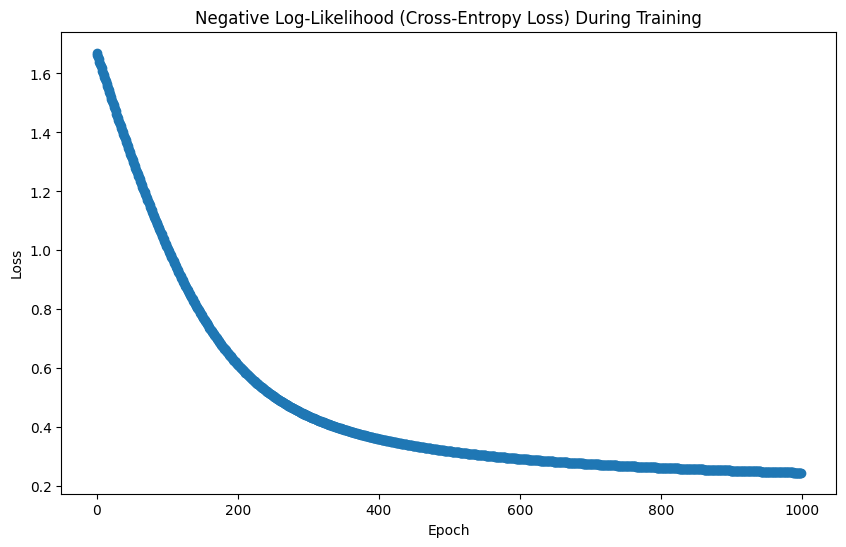

In [ ]:
# Plot Training Loss
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history)), loss_history, marker='o')
plt.title('Negative Log-Likelihood (Cross-Entropy Loss) During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [456]:
# Predict on Test Data
logits_test = np.dot(X_test, W) + b
probs_test = softmax(logits_test)
y_pred = np.argmax(probs_test, axis=1)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 98.33%


Results are as expected since we know that **Negative Log-Likelihood = Cross-Entropy Loss**

### 📚 **Regularization Overview**

Regularization is a technique used to prevent **overfitting** by adding a **penalty term** to the objective function. This additional term discourages complex models by penalizing large parameter values, ensuring that the learned model generalizes well to unseen data.

---

#### 📌 **Effect of Regularization Parameter ($\alpha$)**

The **regularization parameter** $\alpha$ controls the trade-off between:
- Minimizing the **loss function**
- Penalizing **model complexity**

**Behavior of $\alpha$:**

- **Small $\alpha$:**
   - Model is more complex  
   - Higher risk of **overfitting**  
- **Large $\alpha$:**
   - Model is simpler  
   - Higher risk of **underfitting**



##### 📊 **Key Differences Between Regularization Techniques**

| **Regularization Type** | **Penalty Term** | **Effect on Coefficients** | **Use Case**       |
|--------------------------|------------------|-----------------------------|--------------------|
| **Ridge (L2)**          | $\alpha, \theta_2^2$ | Shrinks coefficients but rarely zero | Multicollinearity |
| **Lasso (L1)**          | $\alpha, \theta_1$  | Some coefficients shrink to zero | Feature selection |
| **Elastic Net**         | $\alpha_1, \theta_1 + \alpha_2, \theta_2^2$ | Combines Ridge and Lasso | Correlated features |

**When to Use Each Regularization Technique**

- **Ridge Regression:** When **all features contribute** to the target variable.
- **Lasso Regression:** When **some features are irrelevant** and need to be pruned.
- **Elastic Net:** When features are **highly correlated**.


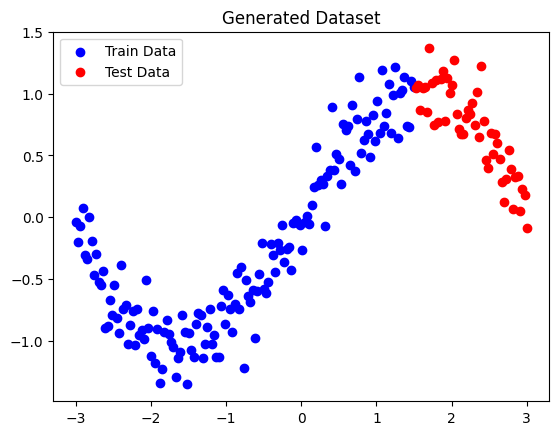

In [514]:
# Add Polynomial Features
def add_polynomial_features(X, degree=3):
    X_poly = np.ones((X.shape[0], 1))  # Start with bias term (x^0)
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))
    return X_poly

# Split Dataset into Train and Test
X, y = generate_nonlinear_squared_data(n_samples=200, noise=0.2)
X_train, X_test = X[:150], X[150:]
y_train, y_test = y[:150], y[150:]

# Plot the Dataset
plt.scatter(X_train, y_train, label='Train Data', color='blue')
plt.scatter(X_test, y_test, label='Test Data', color='red')
plt.legend()
plt.title("Generated Dataset")
plt.show()


##### **1. Ridge Regression (L2 Regularization)**

Ridge regression adds the **squared magnitude** of the model parameters as a **penalty** to the loss function. This penalizes large parameter values, reducing model complexity.

The loss function for Ridge regression is:

$$
\mathcal{L}(\theta) = \frac{1}{N} \sum_{i=1}^N (y_i - f_\theta(x_i))^2 + \alpha \sum_{j=1}^P \theta_j^2
$$

- **When $\alpha = 0$**: No regularization (ordinary least squares).  
- Ridge regression prevents coefficients from becoming excessively large.

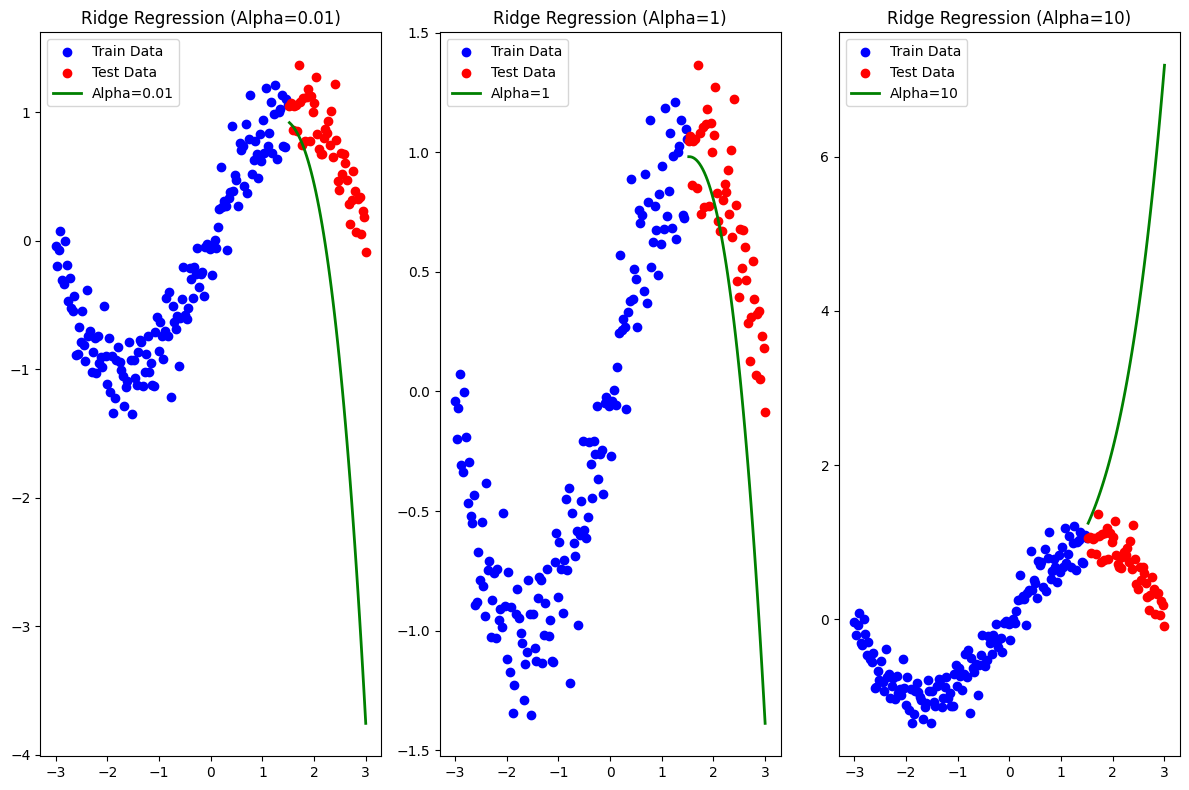

In [497]:
degree = 5
X_train_poly = add_polynomial_features(X_train, degree)
X_test_poly = add_polynomial_features(X_test, degree)

alpha_values = [0.01, 1, 10]
plt.figure(figsize=(12, 8))

for i, alpha in enumerate(alpha_values):
    theta_ridge = ridge_regression(X_train_poly, y_train, alpha=alpha)
    y_pred = X_test_poly @ theta_ridge
    
    plt.subplot(1, 3, i+1)
    plt.scatter(X_train, y_train, color='blue', label='Train Data')
    plt.scatter(X_test, y_test, color='red', label='Test Data')
    plt.plot(X_test, y_pred, color='green', label=f'Alpha={alpha}', linewidth=2)
    plt.title(f'Ridge Regression (Alpha={alpha})')
    plt.legend()

plt.tight_layout()
plt.show()


- A very small penalty term causes the model to overfit the training data, following noise and capturing unnecessary fluctuations.
- A moderate regularization penalty balances bias and variance, resulting in smoother predictions that generalize better.
- As alpha increases, the curve becomes overly smoothed.

**Probabilistic Interpretation of Ridge**

The Ridge loss function can be expressed probabilistically:

$$
\mathcal{L}(\theta) = \text{Negative log-likelihood of data} + \frac{\lambda}{2} ||\theta||_2^2
$$

This corresponds to placing a **Gaussian prior** on the parameters $\theta$:

$$
P(\theta) \sim \mathcal{N}(0, \sigma^2 I)
$$

- Ridge regression assumes the parameters are sampled from a **normal distribution** centered at **zero**.


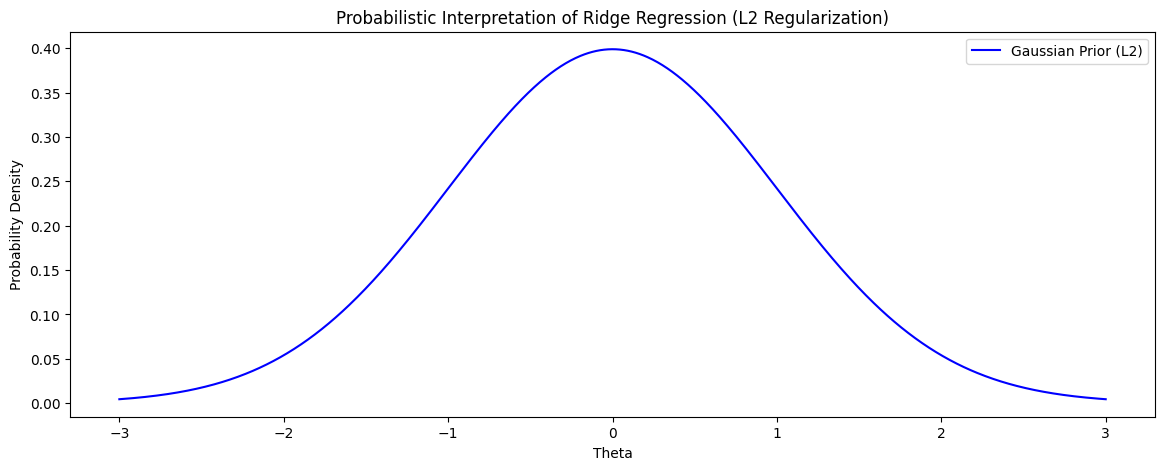

In [ ]:
# Gaussian Prior Simulation for Ridge Regression
np.random.seed(42)

# Prior Distribution (Gaussian Prior on theta)
theta_values = np.linspace(-3, 3, 1000)
prior = (1 / (np.sqrt(2 * np.pi * alpha**2))) * np.exp(-theta_values**2 / (2 * alpha**2))

plt.figure(figsize=(14, 5))
plt.plot(theta_values, prior, label='Gaussian Prior (L2)', color='blue')
plt.title('Probabilistic Interpretation of Ridge Regression (L2 Regularization)')
plt.xlabel('Theta')
plt.ylabel('Probability Density')
plt.legend()
plt.show()



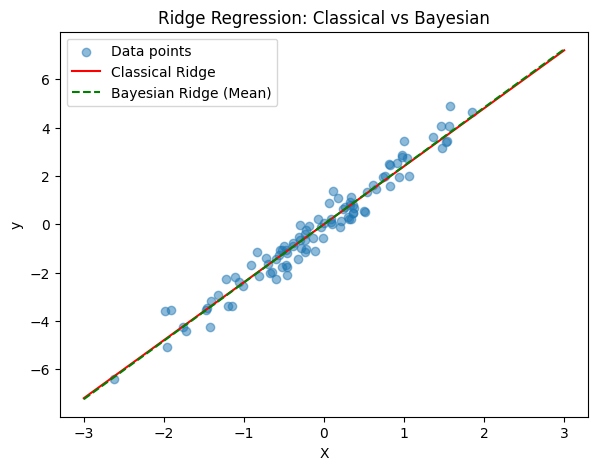

In [499]:
# Synthetic data
np.random.seed(42)
n_samples = 100
n_features = 1

# True parameters
true_theta = 2.5

# Generate X and y with noise
X = np.random.normal(0, 1, (n_samples, n_features))
y = X.flatten() * true_theta + np.random.normal(0, 0.5, n_samples)

# 📌 Set parameters
lambda_reg = 1.0
prior_var = 1 / lambda_reg  # Relationship between ridge penalty and prior variance
noise_var = 0.5

# Fit models
classical_theta = ridge_regression_intercept(X, y, lambda_reg)
posterior_mean, posterior_cov = bayesian_ridge_posterior(X, y, prior_var, noise_var)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X.flatten(), y, alpha=0.5, label='Data points')
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_classical = classical_theta[0] + classical_theta[1] * X_plot
y_bayesian = posterior_mean[0] + posterior_mean[1] * X_plot
plt.plot(X_plot, y_classical, 'r-', label='Classical Ridge')
plt.plot(X_plot, y_bayesian, 'g--', label='Bayesian Ridge (Mean)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression: Classical vs Bayesian')
plt.legend()

plt.subplot(1, 2, 1)
theta0_range = np.linspace(-1, 4, 100)
theta1_range = np.linspace(-1, 4, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)
pos = np.dstack((theta0_grid, theta1_grid))

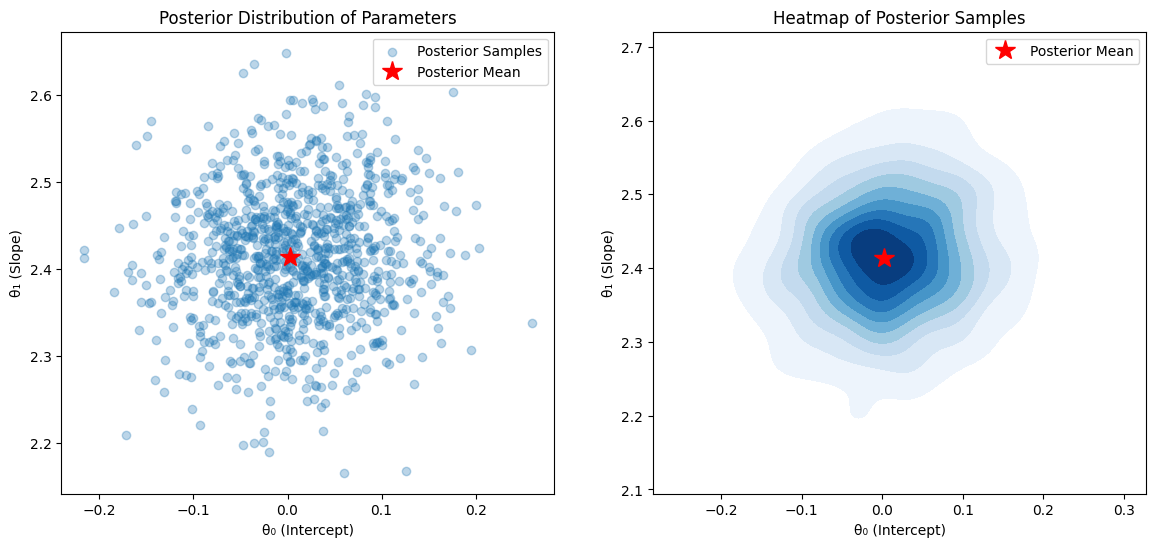

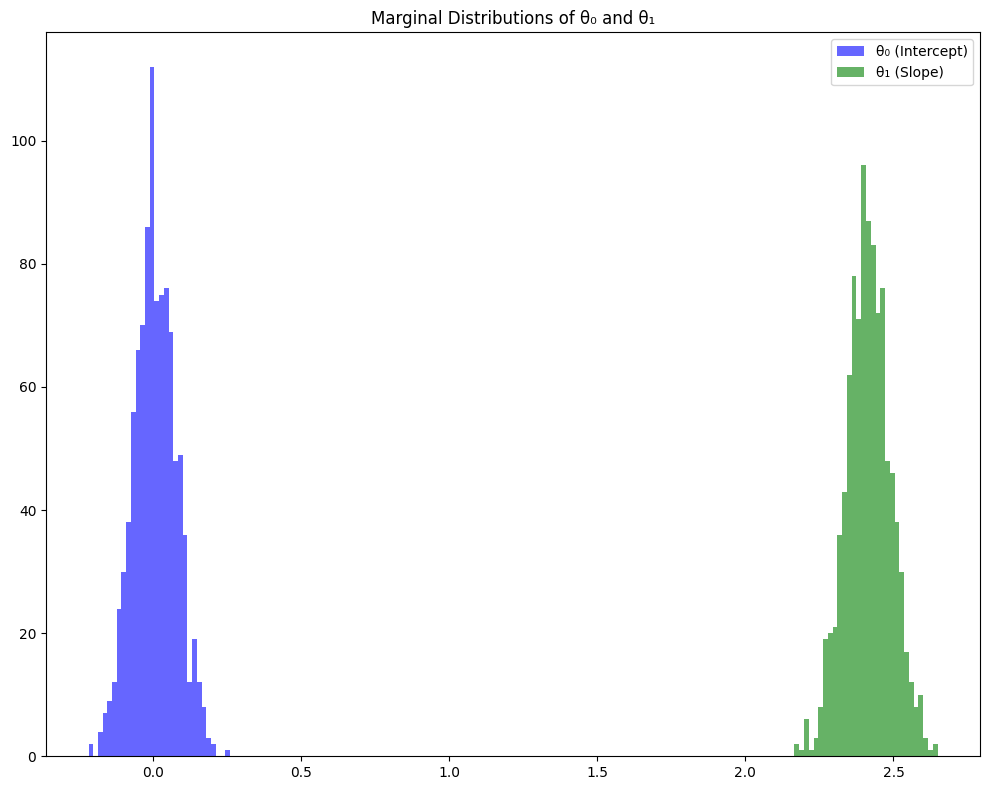

Classical Ridge Regression RMSE: 0.4707578973973359
Bayesian Ridge Regression RMSE: 0.47019837797917297
Posterior Mean: [2.16811100e-03 2.41359034e+00]
Posterior Covariance Matrix:
 [[0.0050401  0.00062885]
 [0.00062885 0.00608587]]


In [500]:
from sklearn.metrics import mean_squared_error

np.random.seed(42)
n_samples_posterior = 1000
posterior_samples = np.random.multivariate_normal(posterior_mean, posterior_cov, n_samples_posterior)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(posterior_samples[:, 0], posterior_samples[:, 1], alpha=0.3, label='Posterior Samples')
plt.plot(posterior_mean[0], posterior_mean[1], 'r*', markersize=15, label='Posterior Mean')
plt.title('Posterior Distribution of Parameters')
plt.xlabel('θ₀ (Intercept)')
plt.ylabel('θ₁ (Slope)')
plt.legend()


plt.subplot(1, 2, 2)
sns.kdeplot(x=posterior_samples[:, 0], y=posterior_samples[:, 1], cmap='Blues', fill=True)
plt.plot(posterior_mean[0], posterior_mean[1], 'r*', markersize=15, label='Posterior Mean')
plt.title('Heatmap of Posterior Samples')
plt.xlabel('θ₀ (Intercept)')
plt.ylabel('θ₁ (Slope)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
plt.hist(posterior_samples[:, 0], bins=30, alpha=0.6, color='b', label='θ₀ (Intercept)')
plt.hist(posterior_samples[:, 1], bins=30, alpha=0.6, color='g', label='θ₁ (Slope)')
plt.title('Marginal Distributions of θ₀ and θ₁')
plt.legend()

plt.tight_layout()
plt.show()

y_classical_pred = classical_theta[0] + classical_theta[1] * X.flatten()
y_bayesian_pred = posterior_mean[0] + posterior_mean[1] * X.flatten()

classical_rmse = np.sqrt(mean_squared_error(y, y_classical_pred))
bayesian_rmse = np.sqrt(mean_squared_error(y, y_bayesian_pred))

print("Classical Ridge Regression RMSE:", classical_rmse)
print("Bayesian Ridge Regression RMSE:", bayesian_rmse)
print("Posterior Mean:", posterior_mean)
print("Posterior Covariance Matrix:\n", posterior_cov)


Unlike classical Ridge Regression, which provides a single point estimate, Bayesian Ridge Regression offers a distribution over possible parameter values.
This allows for more robust predictions, especially in scenarios with noisy or limited data.


##### **2. Lasso Regression (L1 Regularization)**

Lasso regression adds the **absolute magnitude** of the model parameters as a **penalty**. This tends to produce **sparse solutions**, where some coefficients are exactly **zero**, effectively performing **feature selection**.

The loss function for Lasso regression is:

$$
\mathcal{L}(\theta) = \frac{1}{N} \sum_{i=1}^N (y_i - f_\theta(x_i))^2 + \alpha \sum_{j=1}^P |\theta_j|
$$

- Lasso is particularly useful for **feature selection**, as it shrinks some coefficients to **zero**.

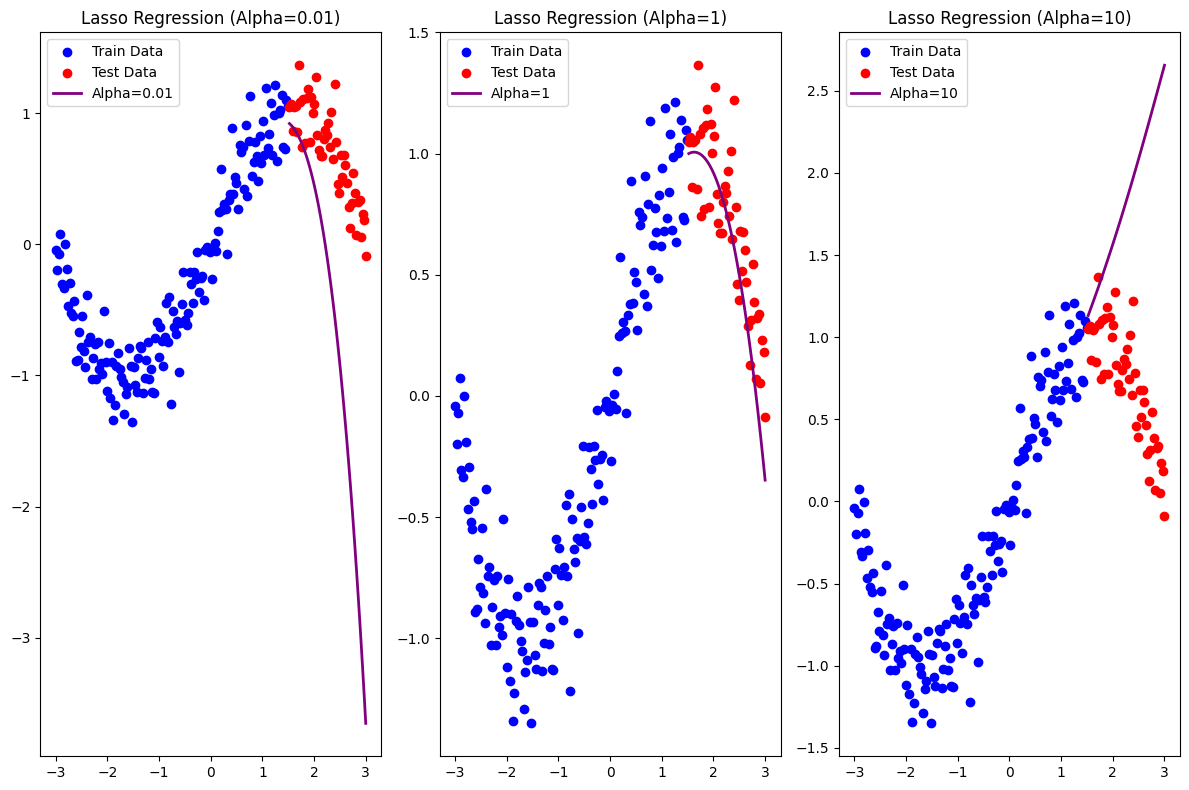

In [515]:
# Add Polynomial Features
def add_polynomial_features(X, degree=3):
    X_poly = np.ones((X.shape[0], 1))  # Start with bias term (x^0)
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))
    return X_poly

# Split Dataset into Train and Test
X, y = generate_nonlinear_squared_data(n_samples=200, noise=0.2)
X_train, X_test = X[:150], X[150:]
y_train, y_test = y[:150], y[150:]

# Lasso Regression using Coordinate Descent
def lasso_regression(X, y, alpha=1.0, n_iter=1000, tol=1e-4):
    theta = np.zeros(X.shape[1])
    for _ in range(n_iter):
        for j in range(len(theta)):
            residual = y - (X @ theta) + X[:, j] * theta[j]
            rho = X[:, j].T @ residual
            if rho < -alpha / 2:
                theta[j] = (rho + alpha / 2) / (X[:, j].T @ X[:, j])
            elif rho > alpha / 2:
                theta[j] = (rho - alpha / 2) / (X[:, j].T @ X[:, j])
            else:
                theta[j] = 0
        if np.linalg.norm(X @ theta - y) < tol:
            break
    return theta

# Apply Lasso Regression
plt.figure(figsize=(12, 8))

for i, alpha in enumerate(alpha_values):
    theta_lasso = lasso_regression(X_train_poly, y_train, alpha=alpha)
    y_pred = X_test_poly @ theta_lasso
    
    plt.subplot(1, 3, i+1)
    plt.scatter(X_train, y_train, color='blue', label='Train Data')
    plt.scatter(X_test, y_test, color='red', label='Test Data')
    plt.plot(X_test, y_pred, color='purple', label=f'Alpha={alpha}', linewidth=2)
    plt.title(f'Lasso Regression (Alpha={alpha})')
    plt.legend()

plt.tight_layout()
plt.show()


- Similar to Ridge, a low alpha leads to overfitting and closely follows the training data's noise.
- Moderate alpha balances bias and variance well. The curve captures the essential trends without overfitting.
- The curve becomes overly simplified, showing high bias. Some feature coefficients are forced to zero. A larger alpha produces a simpler, sparser model
 

**Probabilistic Interpretation of Lasso**

The Lasso loss function can be expressed probabilistically:

$$
\mathcal{L}(\theta) = \text{Negative log-likelihood of data} + \lambda ||\theta||_1
$$

This corresponds to placing a **Laplace prior** on the parameters $\theta$.

$$
P(\theta) \sim \text{Laplace}(0, b)
$$

- Lasso assumes the parameters are sampled from a **Laplace distribution**, which encourages sparsity.


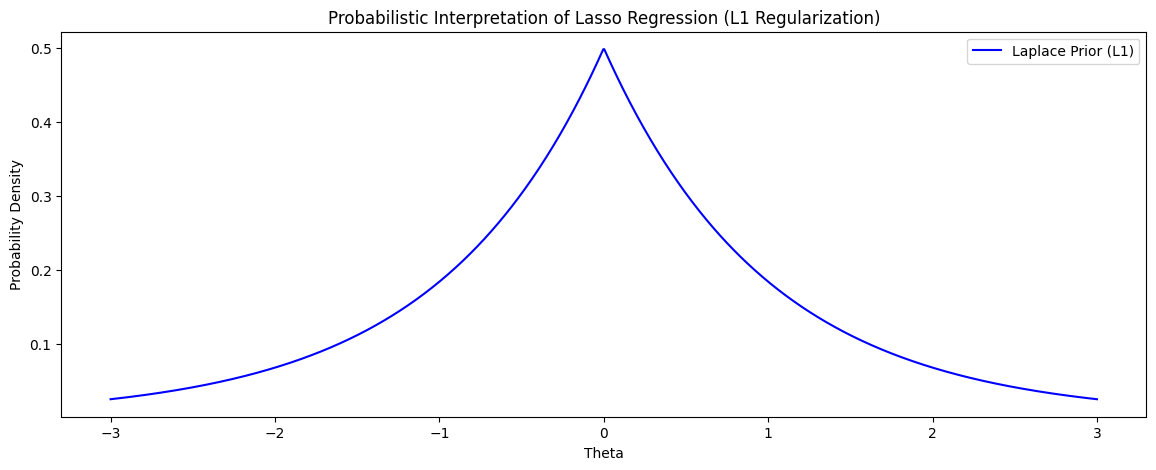

In [512]:
# Laplace Prior Simulation for Lasso Regression
from scipy.stats import laplace

b = 1.0  # Scale parameter for Laplace prior
theta_values = np.linspace(-3, 3, 1000)
laplace_prior = laplace.pdf(theta_values, loc=0, scale=b)

plt.figure(figsize=(14, 5))
plt.plot(theta_values, laplace_prior, label='Laplace Prior (L1)', color='blue')
plt.title('Probabilistic Interpretation of Lasso Regression (L1 Regularization)')
plt.xlabel('Theta')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


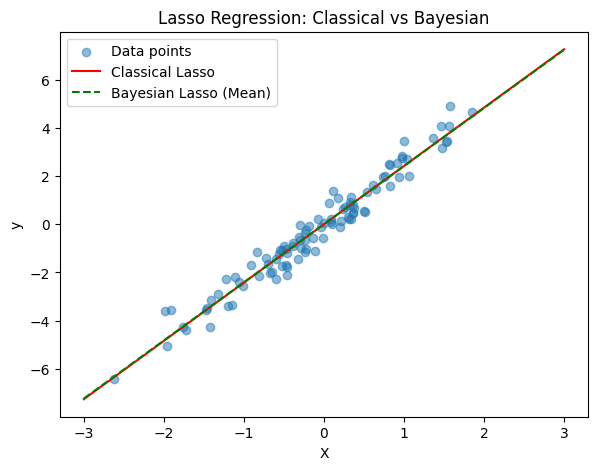

In [520]:
X_design = np.c_[np.ones(n_samples), X]
# Classical Lasso Regression
lambda_reg = 1.0
classical_theta = lasso_regression(X_design, y, lambda_reg)

# Bayesian Lasso Regression
prior_scale = 1 / lambda_reg
noise_var = 0.5
posterior_mean, posterior_cov = bayesian_lasso_posterior(X_design, y, prior_scale, noise_var)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X.flatten(), y, alpha=0.5, label='Data points')
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_classical = classical_theta[0] + classical_theta[1] * X_plot
y_bayesian = posterior_mean[0] + posterior_mean[1] * X_plot
plt.plot(X_plot, y_classical, 'r-', label='Classical Lasso')
plt.plot(X_plot, y_bayesian, 'g--', label='Bayesian Lasso (Mean)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso Regression: Classical vs Bayesian')
plt.legend()

plt.subplot(1, 2, 1)
theta0_range = np.linspace(-1, 4, 100)
theta1_range = np.linspace(-1, 4, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)
pos = np.dstack((theta0_grid, theta1_grid))


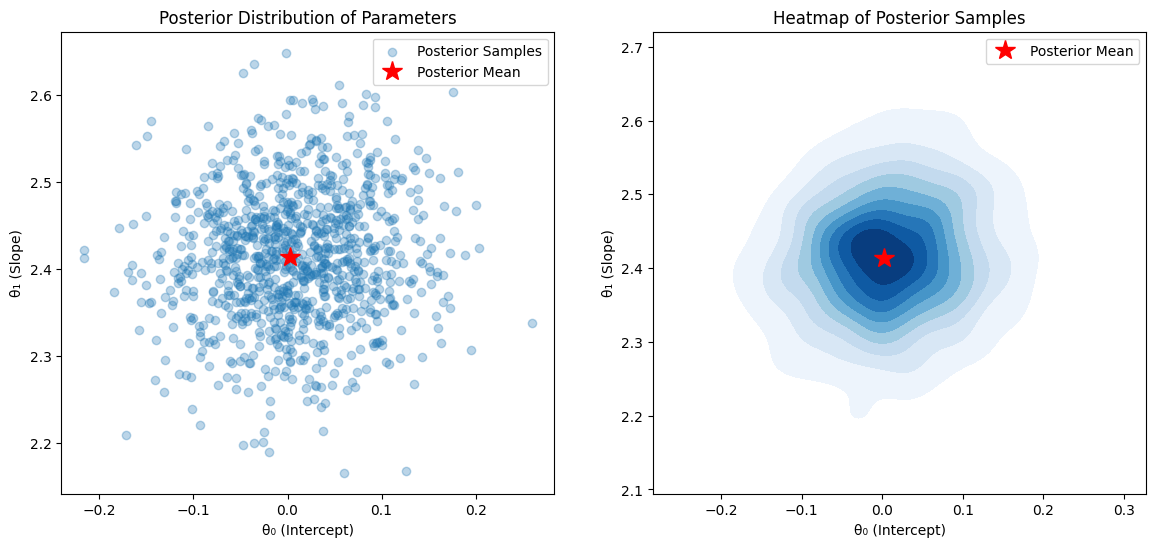

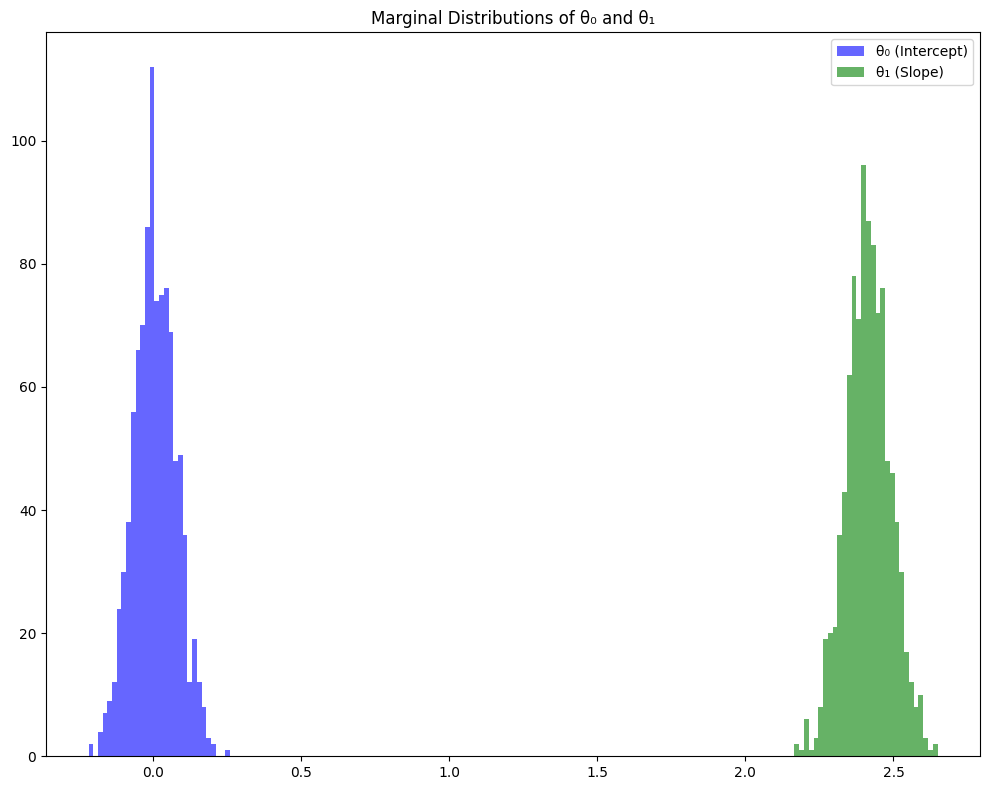

Classical Ridge Regression RMSE: 0.47005526536191117
Bayesian Ridge Regression RMSE: 0.47019837797917297
Posterior Mean: [2.16811100e-03 2.41359034e+00]
Posterior Covariance Matrix:
 [[0.0050401  0.00062885]
 [0.00062885 0.00608587]]


In [519]:
from sklearn.metrics import mean_squared_error

np.random.seed(42)
n_samples_posterior = 1000
posterior_samples = np.random.multivariate_normal(posterior_mean, posterior_cov, n_samples_posterior)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(posterior_samples[:, 0], posterior_samples[:, 1], alpha=0.3, label='Posterior Samples')
plt.plot(posterior_mean[0], posterior_mean[1], 'r*', markersize=15, label='Posterior Mean')
plt.title('Posterior Distribution of Parameters')
plt.xlabel('θ₀ (Intercept)')
plt.ylabel('θ₁ (Slope)')
plt.legend()


plt.subplot(1, 2, 2)
sns.kdeplot(x=posterior_samples[:, 0], y=posterior_samples[:, 1], cmap='Blues', fill=True)
plt.plot(posterior_mean[0], posterior_mean[1], 'r*', markersize=15, label='Posterior Mean')
plt.title('Heatmap of Posterior Samples')
plt.xlabel('θ₀ (Intercept)')
plt.ylabel('θ₁ (Slope)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
plt.hist(posterior_samples[:, 0], bins=30, alpha=0.6, color='b', label='θ₀ (Intercept)')
plt.hist(posterior_samples[:, 1], bins=30, alpha=0.6, color='g', label='θ₁ (Slope)')
plt.title('Marginal Distributions of θ₀ and θ₁')
plt.legend()

plt.tight_layout()
plt.show()

y_classical_pred = classical_theta[0] + classical_theta[1] * X.flatten()
y_bayesian_pred = posterior_mean[0] + posterior_mean[1] * X.flatten()

classical_rmse = np.sqrt(mean_squared_error(y, y_classical_pred))
bayesian_rmse = np.sqrt(mean_squared_error(y, y_bayesian_pred))

print("Classical Ridge Regression RMSE:", classical_rmse)
print("Bayesian Ridge Regression RMSE:", bayesian_rmse)
print("Posterior Mean:", posterior_mean)
print("Posterior Covariance Matrix:\n", posterior_cov)


##### **3. Elastic Net Regularization**

Elastic Net combines **L1 (Lasso)** and **L2 (Ridge)** penalties. It balances the strengths of both methods, penalizing both the **magnitude** and the **sparsity** of parameters.

The loss function for Elastic Net is:

$$
\mathcal{L}(\theta) = \frac{1}{N} \sum_{i=1}^N (y_i - f_\theta(x_i))^2 + \alpha_1 \sum_{j=1}^P |\theta_j| + \alpha_2 \sum_{j=1}^P \theta_j^2
$$

- Elastic Net is effective when there are **highly correlated features**.


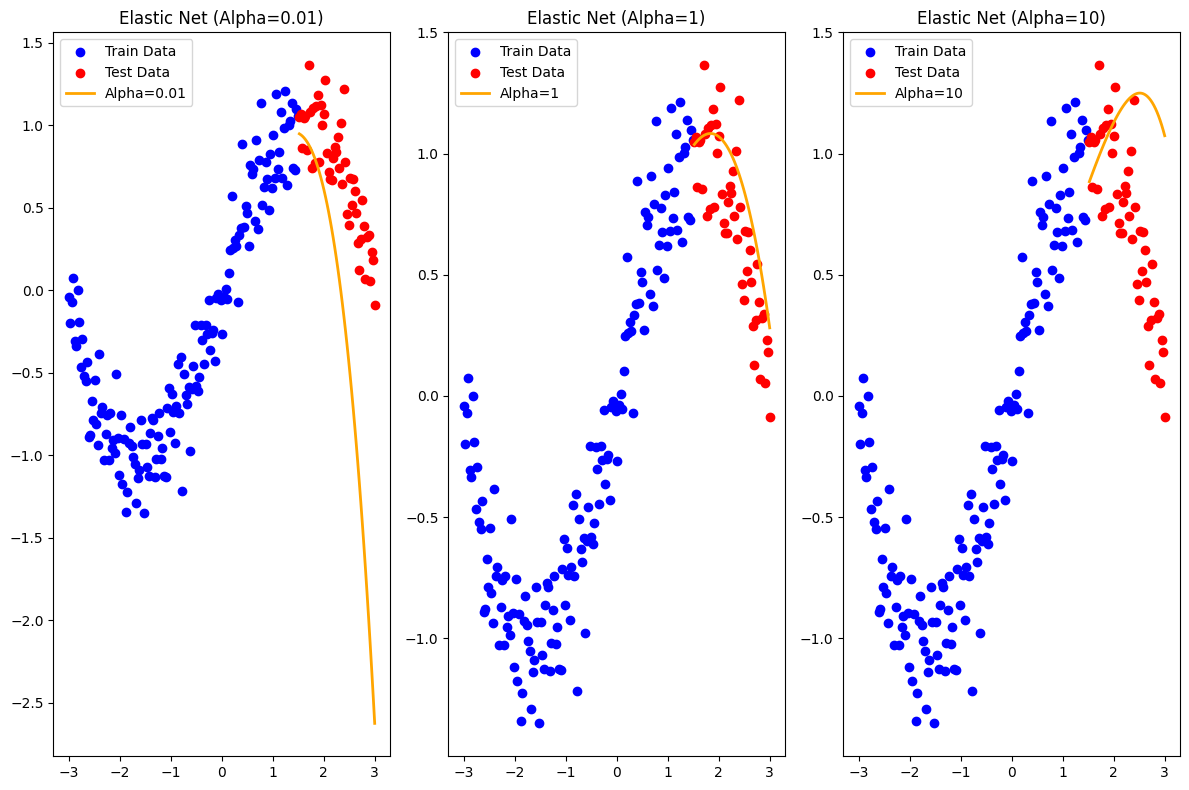

In [464]:
# Apply Elastic Net
plt.figure(figsize=(12, 8))

for i, alpha in enumerate(alpha_values):
    theta_elastic = elastic_net(X_train_poly, y_train, alpha1=alpha, alpha2=0.5)
    y_pred = X_test_poly @ theta_elastic
    
    plt.subplot(1, 3, i+1)
    plt.scatter(X_train, y_train, color='blue', label='Train Data')
    plt.scatter(X_test, y_test, color='red', label='Test Data')
    plt.plot(X_test, y_pred, color='orange', label=f'Alpha={alpha}', linewidth=2)
    plt.title(f'Elastic Net (Alpha={alpha})')
    plt.legend()

plt.tight_layout()
plt.show()


Elastic Net balances the strengths of Ridge and Lasso.

##### 📊 **Key Differences Between Regularization Techniques**

| **Regularization Type** | **Penalty Term** | **Effect on Coefficients** | **Use Case**       |
|--------------------------|------------------|-----------------------------|--------------------|
| **Ridge (L2)**          | $ \alpha \sum \theta_j^2 $ | Shrinks coefficients but rarely zero | Multicollinearity |
| **Lasso (L1)**          | Note1  | Some coefficients shrink to zero | Feature selection |
| **Elastic Net**         | Note2| Combines Ridge and Lasso | Correlated features |

Note1: $ \alpha \sum |\theta_j| $

Note 2:  $ \alpha_1 \sum |\theta_j| + \alpha_2 \sum \theta_j^2 $

**When to Use Each Regularization Technique**

- **Ridge Regression:** When **all features contribute** to the target variable.
- **Lasso Regression:** When **some features are irrelevant** and need to be pruned.
- **Elastic Net:** When features are **highly correlated**.

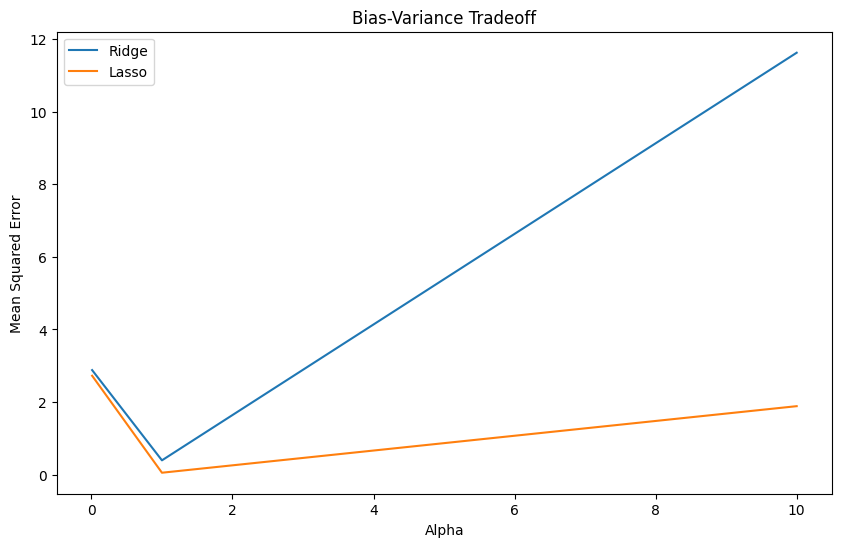

In [465]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, [mean_squared_error(y_test, X_test_poly @ ridge_regression(X_train_poly, y_train, alpha)) for alpha in alpha_values], label='Ridge')
plt.plot(alpha_values, [mean_squared_error(y_test, X_test_poly @ lasso_regression(X_train_poly, y_train, alpha)) for alpha in alpha_values], label='Lasso')
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


As Alpha increases:

- Ridge Regression: MSE increases significantly, indicating growing bias and reduced model flexibility.
- Lasso Regression: MSE increases more slowly, suggesting Lasso is more robust to over-penalization.


### **Validation vs Test Split**

When building machine learning models, it's crucial to evaluate their performance on unseen data to ensure they generalize well. This is achieved using a **validation set** and a **test set**.

- **Validation Set**: Used for hyperparameter tuning and model selection.
- **Test Set**: Used for final model evaluation to measure its true performance on unseen data.

Let's prove it empirically

Dataset Shape: (150, 4), Labels Shape: (150,)
Train size: 90, Validation size: 30, Test size: 30


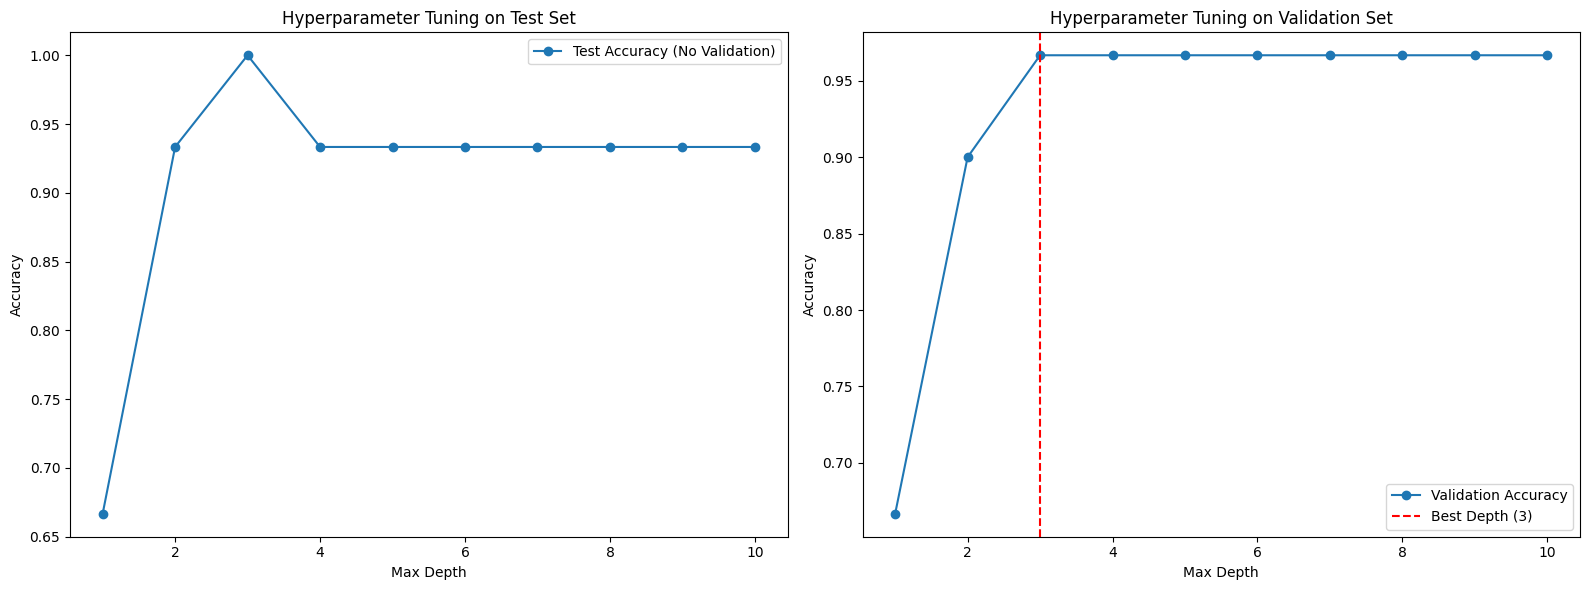

🔑 Best Max Depth (from validation set): 3
📉 Test Accuracy (No Validation Tuning, Depth=5): 0.9333333333333333
✅ Test Accuracy (With Validation Tuning): 1.0


In [525]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns

# Load the Iris Dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

print(f"Dataset Shape: {X.shape}, Labels Shape: {y.shape}")

# Split Data into Train, Validation, and Test Sets
# First split: Train (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
# Second split: Temp -> Validation (50%) and Test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# Hyperparameter Tuning (Max Depth)

# Without Validation (Directly using Test Set)
test_accuracies_no_val = []
max_depths = range(1, 11)

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    test_accuracies_no_val.append(accuracy_score(y_test, y_pred_test))

# With Validation Set
val_accuracies = []
for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    val_accuracies.append(accuracy_score(y_val, y_pred_val))

# Select the Best Hyperparameter Based on Validation Set
best_depth = max_depths[np.argmax(val_accuracies)]
final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_model.fit(X_train, y_train)
final_test_accuracy = accuracy_score(y_test, final_model.predict(X_test))

# Visualization

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(max_depths, test_accuracies_no_val, marker='o', linestyle='-', label='Test Accuracy (No Validation)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning on Test Set')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(max_depths, val_accuracies, marker='o', linestyle='-', label='Validation Accuracy')
plt.axvline(best_depth, color='r', linestyle='--', label=f'Best Depth ({best_depth})')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning on Validation Set')
plt.legend()

plt.tight_layout()
plt.show()

# Model Performance Comparison
y_pred_classical = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, y_train).predict(X_test)
y_pred_better = final_model.predict(X_test)

classical_test_accuracy = accuracy_score(y_test, y_pred_classical)
improved_test_accuracy = accuracy_score(y_test, y_pred_better)

print("🔑 Best Max Depth (from validation set):", best_depth)
print("📉 Test Accuracy (No Validation Tuning, Depth=5):", classical_test_accuracy)
print("✅ Test Accuracy (With Validation Tuning):", improved_test_accuracy)
